In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.convolution import Gaussian1DKernel, convolve
from scipy.optimize import leastsq
from numpy import asarray as ar,exp
from fitfuncs import *

In [ ]:
 #   nuclear region

In [ ]:
def input_cube():
    
    fits_filename = ('/Users/orion/phd_research/3C297/finalcube_3C297_mediansubtracted.fits')     
    hdul = fits.open(fits_filename)
    data_cube = hdul[0].data
    cube_header = hdul[0].header 

    cw = cube_header['CRVAL3']         
    mp = cube_header['CDELT3']       

    y = data_cube[:,33,33]
    x = np.arange(len(y))
    start_w = cw - cube_header['CRPIX3']*mp 
    x = start_w + x*mp
    
    return data_cube, y, x

def error_cube(z, x, y):

    error_cube = ('/Users/orion/phd_research/3C297/line_fitting/error_cubes/centralpix_error_cube.fits')  
    hdul2 = fits.open(error_cube)
    d_error = hdul2[0].data
    stderror = d_error[:,33,33]
    
    k = 1+z
    wave = (x/k)*10000
    
    select = (wave>6450) & (wave<6800)
    error_spec = stderror[select]
    small_wave1 = wave[select]
    data_spec1 = y[select]
    
    #getting rid of nans by smoothing 
    gauss = Gaussian1DKernel(stddev=2)
    err_spec_temp1 = convolve(error_spec, gauss)
    b, err_spec = error_scale(data_spec1,err_spec_temp1)
    
    return error_spec


In [ ]:
def fitting_central7x7(z,x,data_cube,err_spec):
        
    # central 7x7 region:  [30,36] to [36,30] => 49 spaxels
    
    #initial guesses 
    i0 = [100, 30, 20, 20, 0, 20, 20, -50, 600, 0, 10]
    # amp_Ha,amp_NII6585,amp_SII6716,amp_SII6730,vel,vel_sigma,amp_HaB,vel_HaB,vel_sigma_HaB, m, c

    fit = np.zeros(len(i0))    
    err = np.zeros(len(i0))

    for i in range(30,37):              # i ==> y-axis
        for j in range(30,37):      
            print ('Spaxel= [',j,',',i,']')
            y = data_cube[:,i,j]
            y[np.isnan(y)] = 1e-15
            small_wave, small_spec = data_init(z,x,y)
            fit_params, err_params = ltsq_mc_fitting(i0,small_wave,small_spec,err_spec)
            print ('Fit=',fit_params,'\n', 'MC error=',err_params)
            plot(small_wave,small_spec,err_spec,fit_params)
        
            fit = np.vstack([fit, fit_params])
            err = np.vstack([err, err_params]) 
    
    # save arrays to table
    np.savetxt('final-vstack_fit_params.txt', fit, fmt='%4.2f', delimiter='\t')
    np.savetxt('final-vstack_params_err.txt', err, fmt='%4.2f', delimiter='\t')


Spaxel= [ 30 , 30 ]
Fit= [ 7.73594925e+09 -8.28313845e+00  1.57079640e+03 -1.37366447e+01
  3.51225816e+01  2.93057921e+00  5.95227637e+01 -2.18890795e+02
  1.17286259e+02 -7.53234851e-01  6.22960633e+00] 
 MC error= [2.65918702e+11 1.51348100e+03 1.99479273e+05 1.13858605e+07
 5.88957181e+01 5.22472204e+01 2.39934527e+03 2.22329922e+02
 2.49462850e+02 5.16147515e+00 3.42862946e+01]


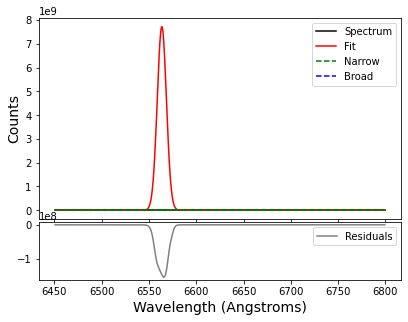

Spaxel= [ 31 , 30 ]
Fit= [-322.43219374   13.33093634    7.61098992    3.78754722 -240.50596766
  174.80483291  396.39644566 -231.44406215  172.1868979    -3.53310742
   25.87843529] 
 MC error= [9.18562612e+04 8.88398858e+03 2.74458358e+06 1.21278756e+08
 6.60120512e+01 3.96496169e+01 8.41897168e+04 1.79755940e+02
 2.84850013e+02 5.61325833e+00 3.73249861e+01]


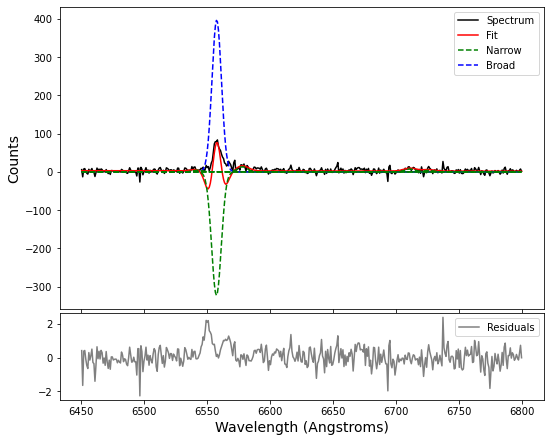

Spaxel= [ 32 , 30 ]
Fit= [-4.69836363e+05  9.37642320e+00  5.37065384e+00  3.06401889e+00
  1.50633088e+02  2.65040013e+02  4.69858509e+05  1.50604971e+02
  2.65064641e+02 -1.39978176e+00  1.24701650e+01] 
 MC error= [1.09836077e+11 6.99632443e+04 1.60978440e+08 1.11966714e+06
 6.56458899e+01 6.65607764e+01 5.36249464e+04 6.47972102e+03
 5.52318263e+03 1.31773189e+03 1.07372473e+04]


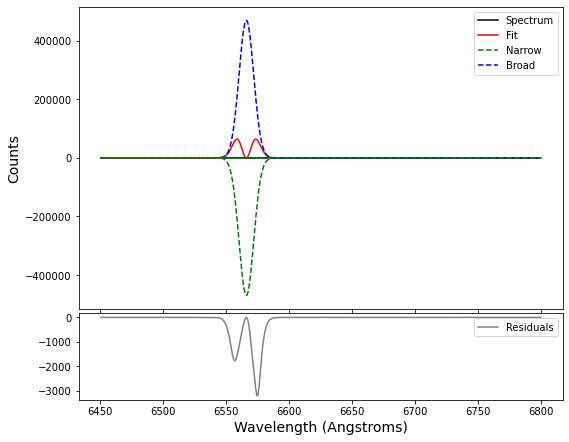

Spaxel= [ 33 , 30 ]
Fit= [-7.33881584e+05  6.37154209e+00  8.25149072e+00  7.17130832e-01
  9.88470751e+01  2.36922778e+02  7.33906932e+05  9.88365496e+01
  2.36935887e+02 -6.35810196e+00  4.64991050e+01] 
 MC error= [1.97499047e+12 5.82211749e+03 4.02322760e+05 1.03634692e+07
 7.10450710e+01 7.12452459e+01 2.62406330e+04 2.47647777e+02
 2.15342110e+02 5.42103630e+00 3.60226613e+01]


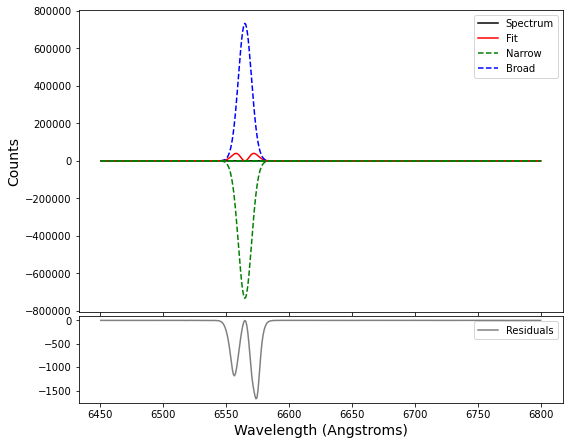

Spaxel= [ 34 , 30 ]
Fit= [  27.50891476    5.26915432    6.81253727    3.63407613 -181.66123628
  264.62926993    6.45832737  492.37557745 1039.04298669    4.42232821
  -25.21460186] 
 MC error= [5.03129307e+11 5.99288379e+04 3.25581989e+05 2.95877133e+09
 3.93250556e+01 5.86096412e+01 1.92739911e+04 4.65294753e+02
 1.78202426e+03 4.96000894e+00 3.37649108e+01]


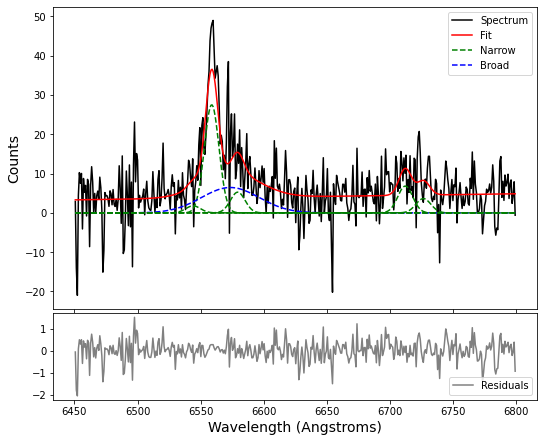

Spaxel= [ 35 , 30 ]
Fit= [  5.4683852   -4.37345963   4.83234262  11.22634428  24.54380465
  41.1732118   17.60376643  81.27789071 620.55598814   3.20980015
 -16.34882369] 
 MC error= [5.15917529e+09 1.22697303e+03 1.17952442e+05 6.64027804e+05
 4.68810025e+01 3.70142540e+01 1.39571060e+04 6.27480566e+03
 5.37383675e+03 1.03196241e+03 8.36639887e+03]


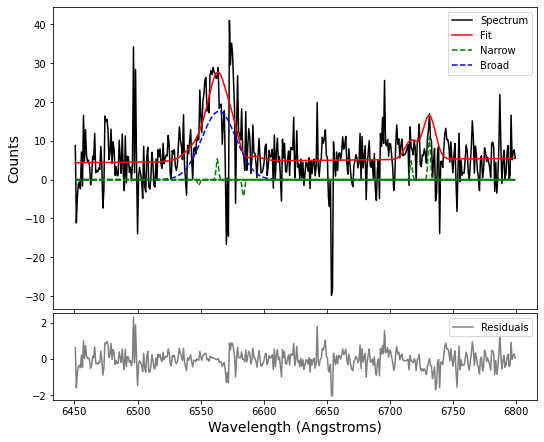

Spaxel= [ 36 , 30 ]
Fit= [-9.38508872e+00 -2.61753338e-01  4.01202450e+00  7.19388871e+00
  3.79471846e+01  5.02450217e+01  1.78168119e+01  3.53372734e+01
  4.84817466e+02 -2.89360642e+00  2.31560575e+01] 
 MC error= [1.08935403e+12 1.61574247e+04 2.04778837e+05 6.49279180e+06
 3.96228985e+01 3.61226710e+01 2.10172561e+03 3.58233572e+02
 2.83566943e+02 4.81001546e+00 3.20640676e+01]


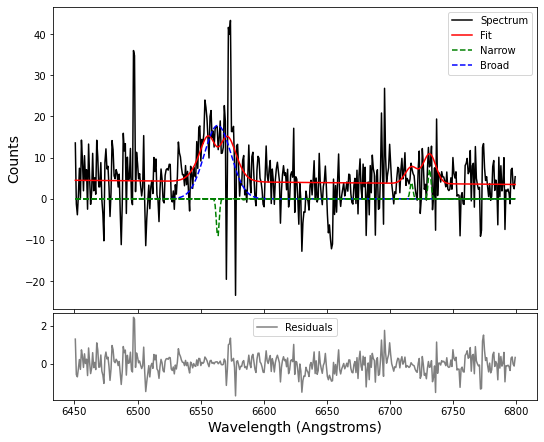

Spaxel= [ 30 , 31 ]
Fit= [   7.66956098    7.5330238    22.41926697    1.59892037    5.86429617
   10.88429747   46.96020189 -130.22984507  184.68156679   -3.3657504
   23.53266376] 
 MC error= [2.88460788e+11 4.80580718e+03 5.98286993e+04 4.70978206e+05
 3.55077655e+01 3.66114053e+01 4.03338514e+04 3.82491287e+02
 2.82302747e+02 5.20167819e+00 3.46256544e+01]


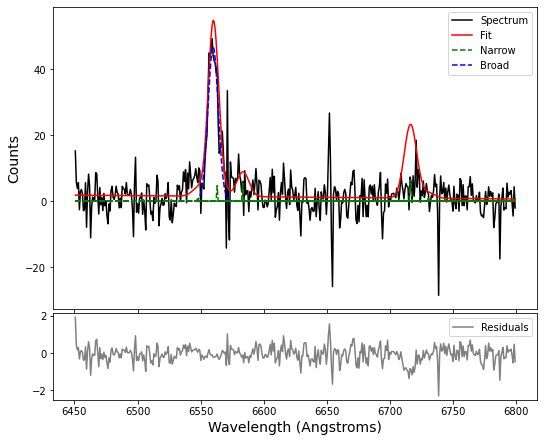

Spaxel= [ 31 , 31 ]
Fit= [  65.34876683    2.43758258    7.6051976     4.80231162 -124.13392141
  167.97851415   10.40301367  169.10077396 1011.42289746    1.01361689
   -5.23313283] 
 MC error= [1.69419022e+11 3.71578632e+04 5.79879040e+05 5.89544397e+06
 4.89314849e+01 5.81355536e+01 1.88144740e+04 4.55092405e+02
 6.89811153e+02 1.01591979e+01 6.88187114e+01]


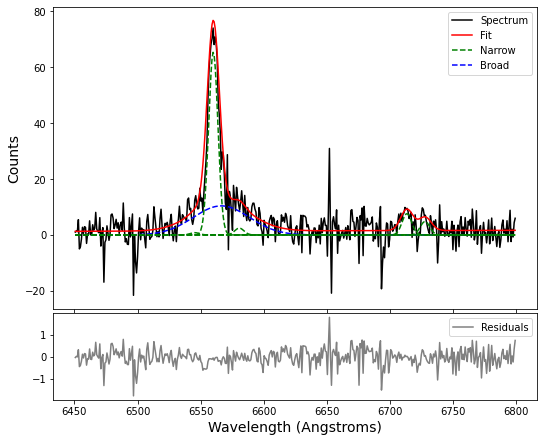

Spaxel= [ 32 , 31 ]
Fit= [ 7.41407461e+01  4.61116741e+00  9.20544100e+00  6.82880860e+00
 -1.01237856e+02  1.75672392e+02  1.78851809e+01  1.37609099e+02
  7.46756046e+02  1.29666494e-01  1.62830855e+00] 
 MC error= [2.50186948e+12 4.07643657e+05 2.71647047e+06 1.79972480e+07
 5.70271562e+01 7.88577629e+01 8.55634745e+04 3.23735441e+02
 6.03444691e+02 8.33912765e+00 5.63639105e+01]


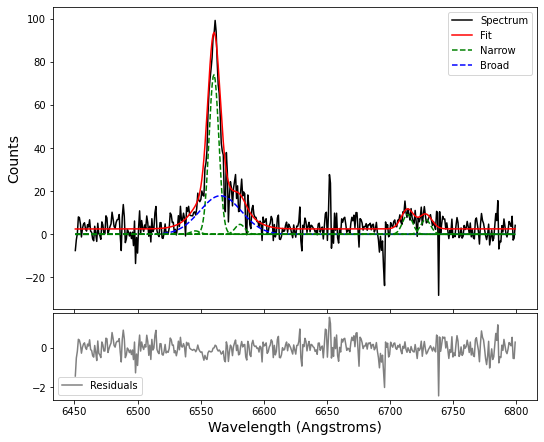

Spaxel= [ 33 , 31 ]
Fit= [ 60.01378     -2.48961172   9.86044147   4.65313139 -79.40489704
 207.53743715  18.56490098 272.83652142 748.81081748  -5.88563446
  42.97791457] 
 MC error= [2.79740674e+11 1.67538455e+03 2.21028622e+05 2.24526941e+03
 5.55334238e+01 7.76225678e+01 2.19635844e+04 2.61807731e+02
 2.29203805e+02 5.36935932e+00 3.57083000e+01]


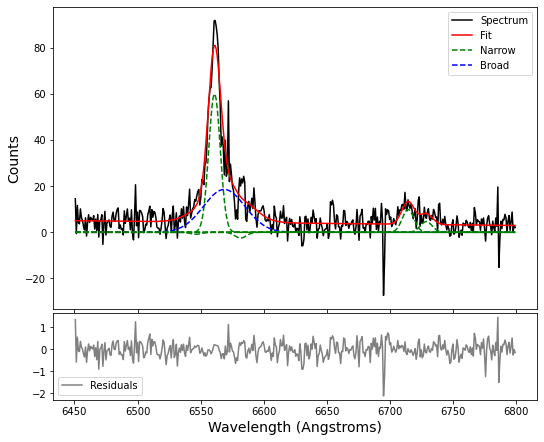

Spaxel= [ 34 , 31 ]
Fit= [ 3.86659984e+01  6.60725105e+00  7.88687104e+00  3.09097798e+00
 -1.13967451e+02  2.64965155e+02  7.33002272e+00  2.88981478e+02
  1.07801999e+03 -5.99799337e-01  8.77766224e+00] 
 MC error= [8.08524998e+10 1.58920869e+04 2.34409542e+04 7.43612740e+07
 4.83612092e+01 5.71291929e+01 2.66433401e+01 2.35838928e+02
 3.19702752e+02 5.74556223e+00 3.82313297e+01]


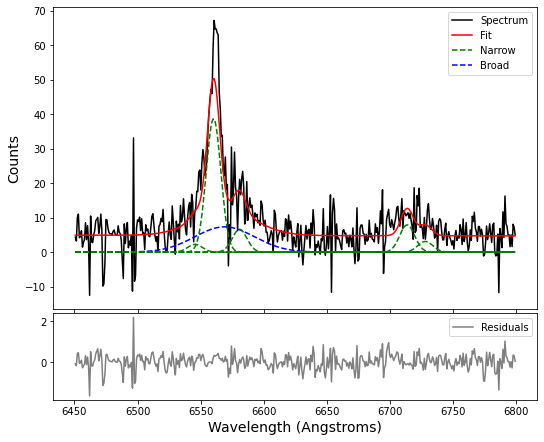

Spaxel= [ 35 , 31 ]
Fit= [  20.28450153    6.22989707    5.56129755    2.68604559 -220.96451316
  416.3312817     2.22551456  626.91263351 1970.02576141    2.11697996
   -9.60425532] 
 MC error= [1.17247606e+12 8.98218071e+03 3.71694769e+05 6.50617540e+03
 4.36419334e+01 6.62047069e+01 2.29873222e+02 2.78291188e+02
 3.09745847e+02 6.08634679e+00 4.05179154e+01]


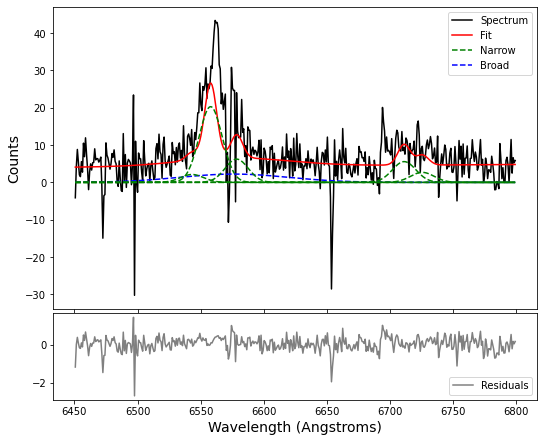

Spaxel= [ 36 , 31 ]
Fit= [  -9.36242248  -16.81510501    3.73526396    2.69356721 -148.85551555
  452.78315853   32.25484704  145.35890153  800.54755818   -2.12223489
   17.39439436] 
 MC error= [6.66240951e+10 3.68803076e+03 6.44690280e+04 5.70061355e+03
 5.19306114e+01 5.77805877e+01 1.49427519e+04 7.45569437e+02
 2.77550412e+03 9.35680418e+00 6.23886162e+01]


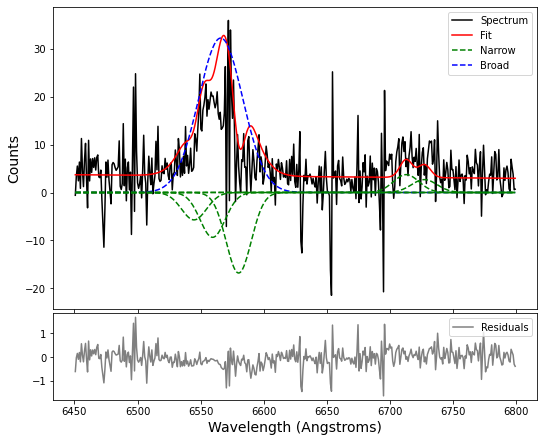

Spaxel= [ 30 , 32 ]
Fit= [ 26.50262011  -2.89284072   6.29613432   4.18779701   9.24655296
 239.33600199   9.40964568 249.01529672 830.1600897   -4.04926089
  27.87878408] 
 MC error= [2.24839604e+12 3.68488129e+02 7.99115594e+04 1.67507940e+06
 5.06077921e+01 5.36175124e+01 2.66245090e+04 4.20184338e+02
 2.65309730e+02 4.96134322e+00 3.29398456e+01]


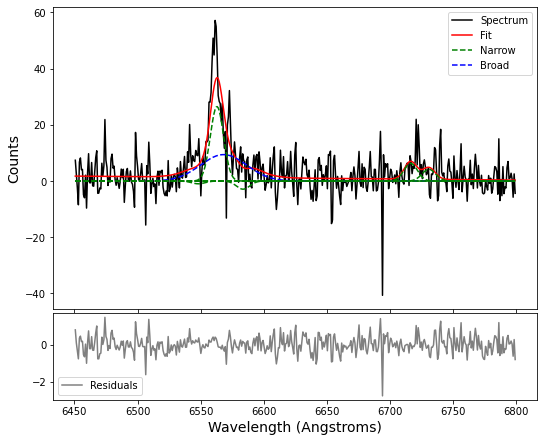

Spaxel= [ 31 , 32 ]
Fit= [ 8.49081408e+01  5.53783109e+00  7.89800094e+00  8.05398444e+00
 -4.67303304e+01  1.62384464e+02  8.90286575e+00  2.62884875e+02
  1.04165761e+03 -5.43626597e-01  4.92423082e+00] 
 MC error= [1.23521902e+11 4.83895930e+03 1.32661152e+05 8.56285001e+05
 4.71746296e+01 6.82856576e+01 5.07112580e+04 3.76482149e+03
 3.50691598e+03 6.07618623e+02 4.56629730e+03]


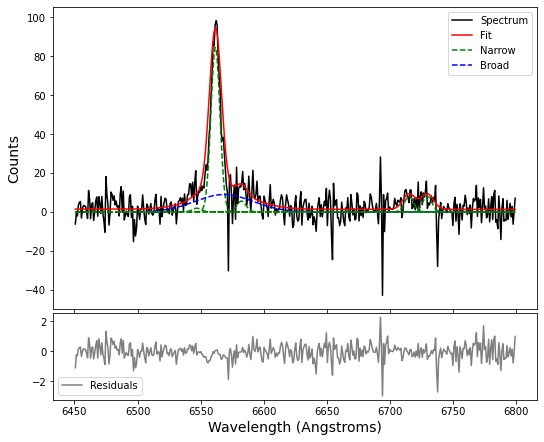

Spaxel= [ 32 , 32 ]
Fit= [113.49671226   9.84581916  12.56587341   8.98653426 -26.75367494
 149.73305944  16.89710455 -28.036747   779.4210507   -3.58372337
  25.97365979] 
 MC error= [8.35373681e+06 1.09306541e+03 4.51747892e+05 3.30422731e+03
 3.55073576e+01 7.15466771e+01 6.34070722e+04 3.57312406e+02
 3.68749456e+02 4.95241726e+00 3.30640684e+01]


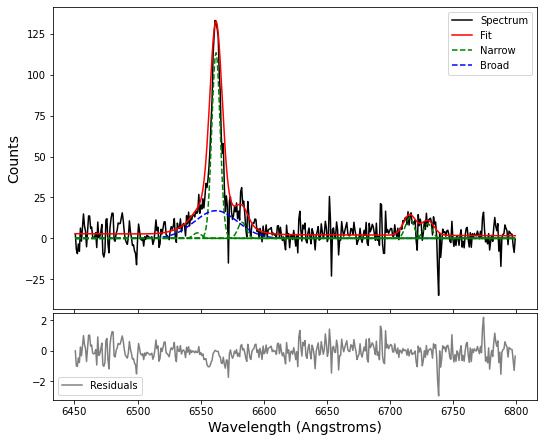

Spaxel= [ 33 , 32 ]
Fit= [ 96.38612921  10.80567888  11.67320119   5.10649355 -14.3823353
 155.68055142  21.63306382  61.55171421 719.32371867  -7.6295656
  54.54371122] 
 MC error= [1.52345700e+11 1.16243152e+03 5.75935621e+04 2.02733247e+03
 5.33428325e+01 8.10057297e+01 4.31069055e+01 2.57908963e+02
 3.45588616e+02 6.00642978e+00 4.00225158e+01]


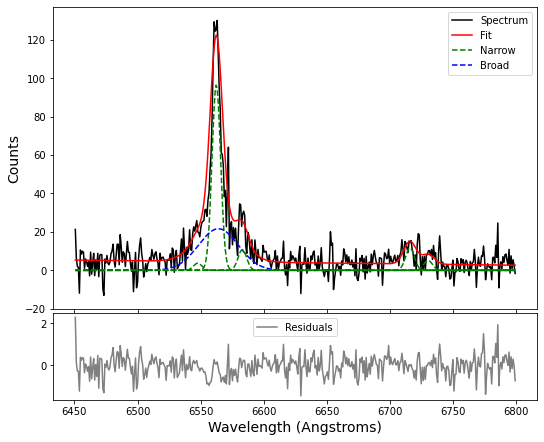

Spaxel= [ 34 , 32 ]
Fit= [ 5.95676569e+01  8.42990756e+00  6.56664340e+00  4.17870188e+00
  1.52187898e+00  1.67975110e+02  1.93424264e+01 -5.21585389e-01
  7.82164082e+02 -5.22392774e+00  4.04742578e+01] 
 MC error= [1.22854272e+12 1.75197721e+03 2.93516260e+05 1.99075849e+04
 3.84453682e+01 6.11357509e+01 1.49070694e+01 3.14333403e+02
 2.10981916e+02 5.90408539e+00 3.93053727e+01]


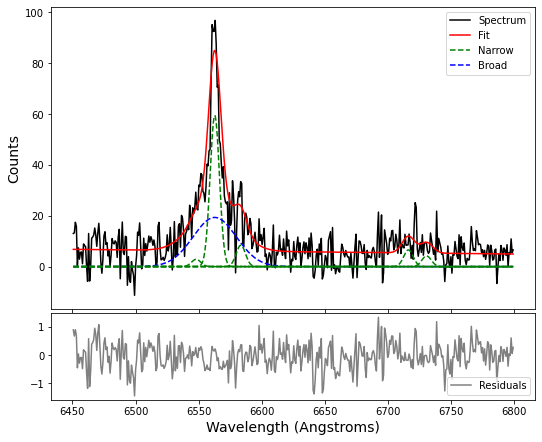

Spaxel= [ 35 , 32 ]
Fit= [ 2.63926536e+01  6.15254459e+00  4.07785396e+00  3.42967828e+00
 -1.53636692e+02  4.99984753e+02  2.94935661e+00 -2.17141892e+03
 -3.28672444e+02 -1.24239851e+00  1.35999894e+01] 
 MC error= [8.05003124e+12 2.03436616e+05 1.03405259e+06 1.27858816e+06
 3.60453251e+01 5.71189580e+01 7.30444305e+02 2.26985057e+02
 2.42407444e+02 5.04936464e+00 3.36473019e+01]


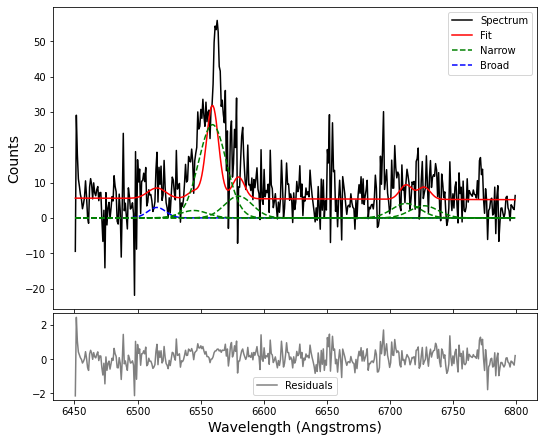

Spaxel= [ 36 , 32 ]
Fit= [ 1.43103965e+01 -1.57741952e+00  5.20221831e+00  2.98352533e+00
 -9.51561357e+01  4.99717805e+02  6.60928746e+00 -5.51193564e+02
  3.13000533e+03  1.14495358e+01 -7.44667166e+01] 
 MC error= [5.74346697e+10 1.10088204e+05 9.28922011e+05 4.50474912e+06
 6.91979450e+01 1.27944911e+02 1.59832304e+02 2.46008483e+03
 2.80214633e+03 9.65452821e+01 7.15256773e+02]


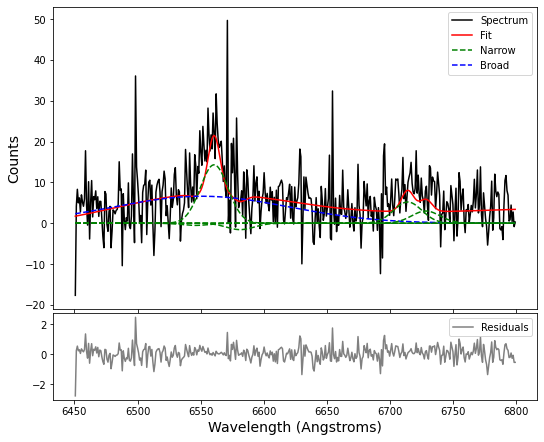

Spaxel= [ 30 , 33 ]
Fit= [  32.10332437    2.52090911    3.14108147    4.54218442  -28.80988755
  225.03116178   11.10231777 -962.77540241   74.97612901   -6.31048722
   42.46863491] 
 MC error= [3.26341524e+05 1.84110926e+04 1.77424775e+04 4.89153541e+08
 4.88940888e+01 7.41204257e+01 2.09476002e+04 9.33716397e+03
 7.28414964e+03 2.47626976e+03 2.17005870e+04]


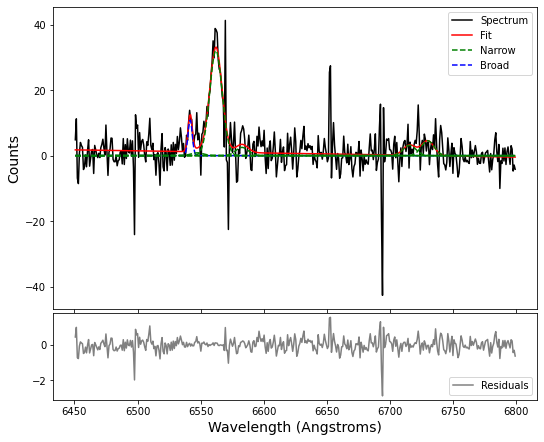

Spaxel= [ 31 , 33 ]
Fit= [ 6.23210063e+01  4.19874229e+00  7.44648265e+00  5.41781180e+00
 -1.52009668e+01  1.63183294e+02  8.58060060e+00 -2.10057737e+02
  8.75543229e+02 -8.29607047e-01  6.30277154e+00] 
 MC error= [7.01250406e+11 1.45138419e+03 6.00062856e+05 1.68682677e+05
 3.67455797e+01 5.79446663e+01 4.26708314e+04 7.50064797e+03
 6.17979744e+03 1.47737552e+03 1.23550230e+04]


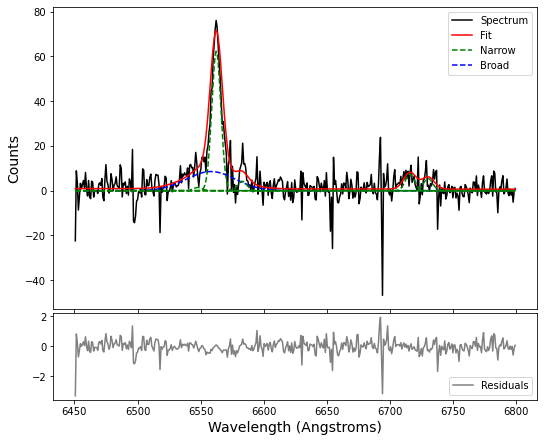

Spaxel= [ 32 , 33 ]
Fit= [  80.82121129   10.65736605    8.89896832    7.69833556   -8.73945495
  136.67742538   18.39502468 -133.03219835  575.49189163   -5.4071525
   37.96723178] 
 MC error= [7.12929399e+09 5.32922274e+04 1.23069540e+05 8.91098453e+04
 2.97553616e+01 6.01212005e+01 4.42159946e+01 1.75845032e+02
 2.06785756e+02 5.93694580e+00 3.94461635e+01]


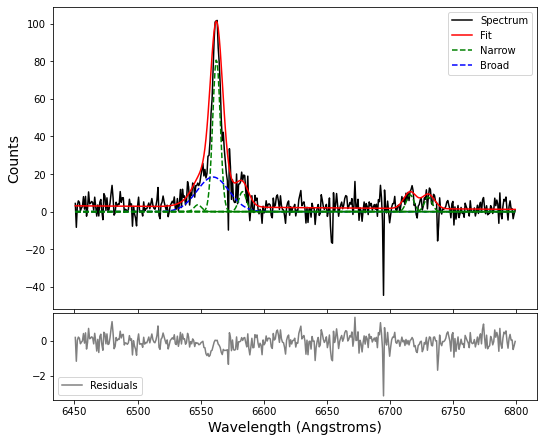

Spaxel= [ 33 , 33 ]
Fit= [ 77.68060732  13.07884821  10.54298871   5.7057985    2.10645565
 144.4386931   17.36407785 -67.69710952 709.2697676   -4.0919463
  29.40333908] 
 MC error= [1.28606936e+12 2.28824128e+04 4.17636617e+05 5.69077960e+05
 3.47421199e+01 7.63817472e+01 2.14644337e+01 5.19092391e+02
 5.47277831e+02 1.01164914e+01 6.80096008e+01]


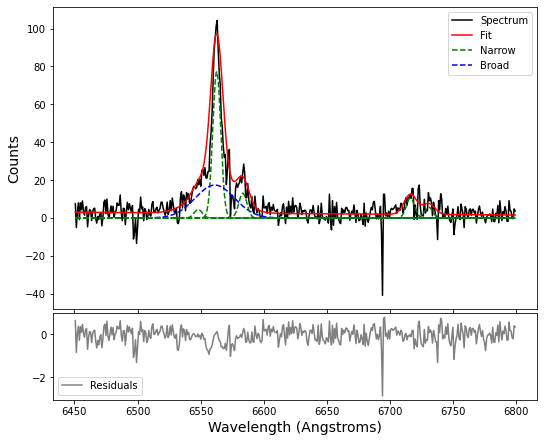

Spaxel= [ 34 , 33 ]
Fit= [  52.27934548   14.03714628    6.91767861    5.12383708   30.95717226
  172.04270517   13.85043966 -299.00080034  648.22515192   -3.26381772
   25.27167437] 
 MC error= [2.72288302e+10 4.22693133e+04 2.35642134e+05 4.32308974e+03
 6.39576774e+01 7.53380603e+01 7.02653784e+01 3.19041711e+03
 3.65075420e+03 4.21458064e+01 3.27338653e+02]


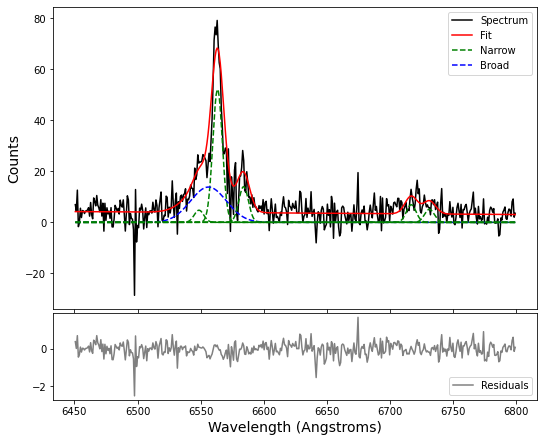

Spaxel= [ 35 , 33 ]
Fit= [  33.62025427   11.52517389    2.05691187    5.13949036   -2.36055031
  175.48585346   11.38357547 -508.68557733  348.25925244   -4.09304542
   31.25079119] 
 MC error= [1.06662728e+11 1.86153888e+02 8.19196812e+04 1.56873306e+03
 4.49837932e+01 4.58639975e+01 1.02891444e+02 7.47349064e+02
 4.30603367e+02 5.67375503e+00 3.77397515e+01]


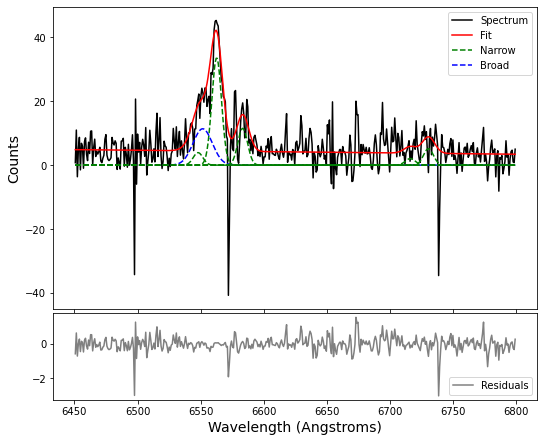

Spaxel= [ 36 , 33 ]
Fit= [  18.19277889   -1.86442013    5.29403108   -4.04949192  -12.08557322
   22.21162724   10.74939221 -103.36818569  587.71311603   -4.97206655
   36.41817238] 
 MC error= [4.08701392e+09 1.29890101e+05 2.26716796e+06 3.47764966e+09
 5.83072967e+01 4.15294318e+01 6.65008352e+03 9.33582838e+03
 7.56256993e+03 2.00798801e+03 1.73384882e+04]


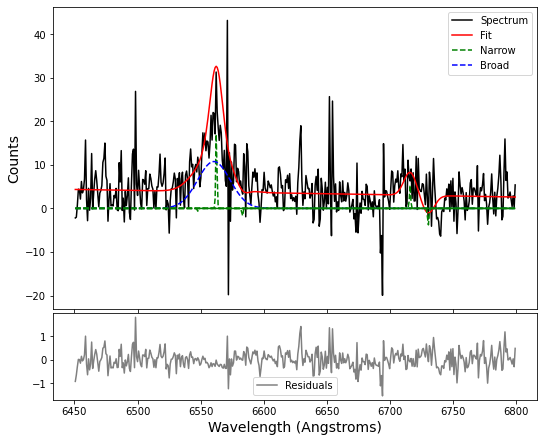

Spaxel= [ 30 , 34 ]
Fit= [ 2.14561203e+01 -7.57477862e-01  3.19622707e+00  3.84014219e+00
 -4.72262289e+01  1.61298936e+02  6.21780638e+00 -6.04175661e+02
  3.20834724e+03  8.09267980e+00 -5.58275053e+01] 
 MC error= [6.52388315e+10 1.60401251e+06 6.38748861e+06 8.42028104e+10
 3.50118887e+01 2.02031482e+01 1.39895263e+04 1.36633579e+04
 1.06155938e+04 3.86342677e+03 3.41302804e+04]


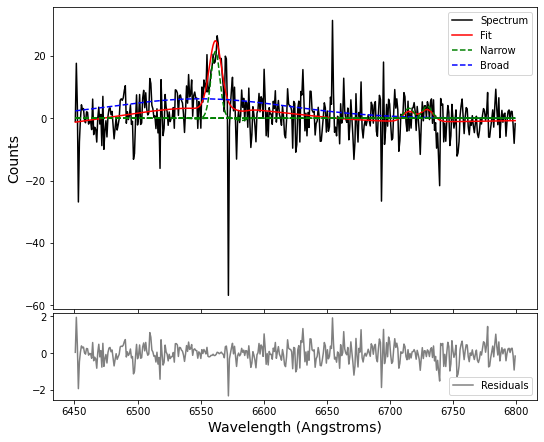

Spaxel= [ 31 , 34 ]
Fit= [  40.83726502    7.60687704    5.05039632    4.62558086   12.72252383
  106.69275728   11.6230074  -314.55634703  576.07725165   -4.79699007
   32.56241676] 
 MC error= [1.29920998e+11 3.02897421e+03 5.09682584e+05 3.32902329e+06
 4.02997748e+01 3.22230980e+01 2.35874281e+04 4.93022266e+02
 5.04505487e+02 7.26802634e+00 4.86208494e+01]


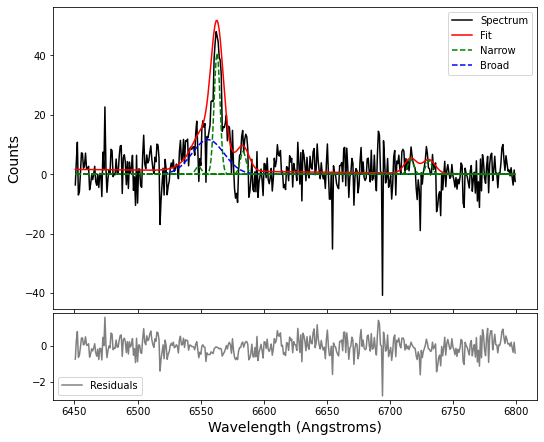

Spaxel= [ 32 , 34 ]
Fit= [  51.69526124    8.05405872    6.12720553    6.60603986   -0.87132857
  109.98034372   16.43131664 -123.58760251  557.19564792   -3.60088457
   25.27961688] 
 MC error= [3.78743360e+12 8.50829260e+03 1.59098225e+05 8.78488654e+03
 3.22443783e+01 5.21337968e+01 9.63290257e+01 9.40304943e+02
 1.14871421e+03 4.20521944e+01 2.90192457e+02]


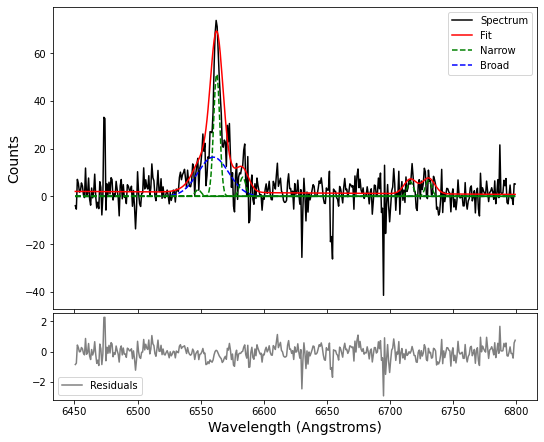

Spaxel= [ 33 , 34 ]
Fit= [  53.51550624    8.24032125    8.22048502    6.50474677   15.36308225
  121.7338218    14.70816048 -147.47415517  790.57517036   -2.05678773
   15.04666911] 
 MC error= [1.98706475e+08 3.27790880e+02 7.30135592e+05 1.10917180e+04
 3.64665644e+01 7.74939440e+01 1.76609363e+01 4.65513572e+02
 5.56149857e+02 8.48023342e+00 5.71581233e+01]


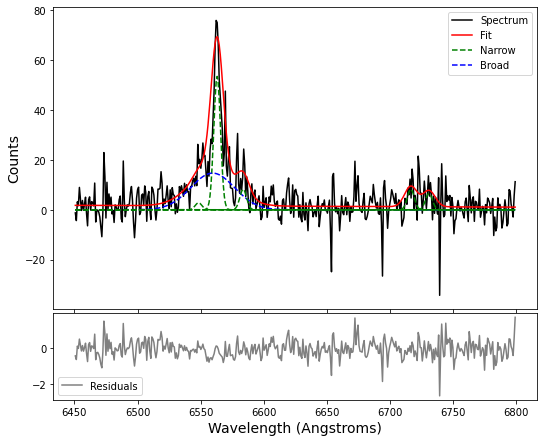

Spaxel= [ 34 , 34 ]
Fit= [  43.54167804   13.09791624    7.59402392    4.57395114   47.26692073
  169.76233849   11.42846768 -461.01490314  498.64264721   -1.23265952
    9.61218702] 
 MC error= [7.10015441e+11 1.41332257e+05 4.63247430e+05 1.13127994e+06
 4.91628127e+01 5.61063738e+01 2.05491069e+04 2.39254384e+03
 2.67719623e+03 1.02992744e+02 7.59403925e+02]


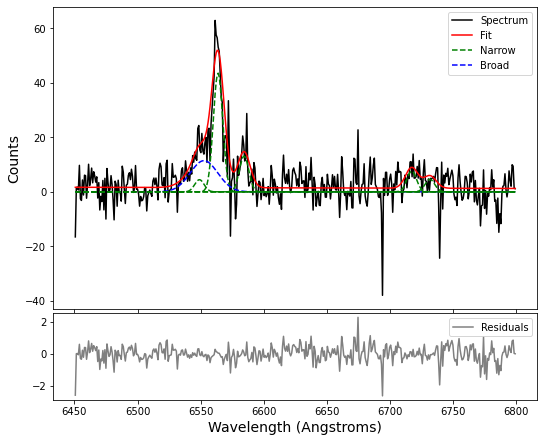

Spaxel= [ 35 , 34 ]
Fit= [ 2.99639909e+01  1.09713191e+01  1.27449842e+00  1.00878189e-02
  4.55028916e+01  1.33144093e+02  9.95476374e+00 -3.61704253e+02
  2.96533194e+02 -2.66230409e+00  2.00674997e+01] 
 MC error= [1.98356133e+10 1.66068867e+04 4.80478190e+05 1.94441867e+07
 1.33267736e+02 3.32791722e+01 1.48854179e+03 6.49112738e+03
 6.11823285e+03 5.45001772e+02 4.45485243e+03]


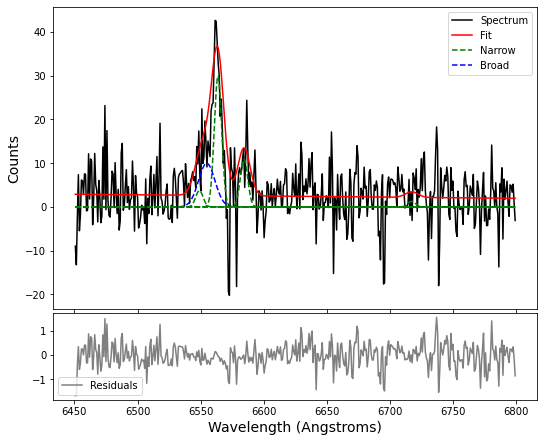

Spaxel= [ 36 , 34 ]
Fit= [ 6.95423244e+00  6.62144555e-01  6.68271399e+00 -2.55427346e+00
 -5.36345712e+01  4.67973066e+02  4.58978221e+04 -8.93672906e+04
  7.05549743e+04  1.37661307e+04 -1.19048697e+05] 
 MC error= [9.39578662e+09 1.93118912e+05 7.89666730e+04 7.00099178e+09
 4.75043703e+01 3.92197460e+01 7.08787605e+02 4.74731724e+03
 4.67717784e+03 5.02071951e+02 3.75080256e+03]


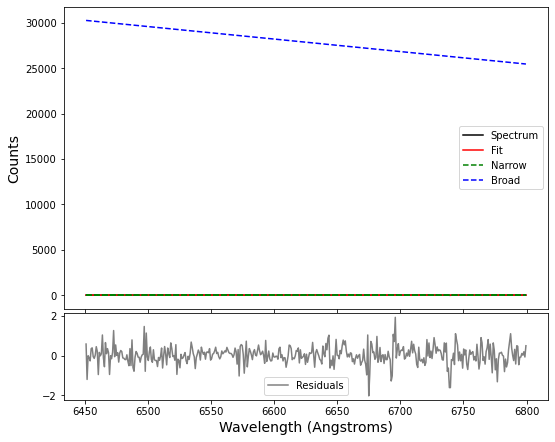

Spaxel= [ 30 , 35 ]
Fit= [  -4.20383653  -15.36801276    2.75829213   -2.41337177   55.63305906
  526.80503985   18.85993204  406.02601079 1087.25124606    1.46047256
  -10.27335306] 
 MC error= [2.14406596e+09 1.03164168e+04 1.00021649e+06 2.02427367e+07
 3.76170557e+01 4.32871852e+01 5.89259318e+03 1.19210609e+04
 1.03727052e+04 2.33853548e+03 1.90635257e+04]


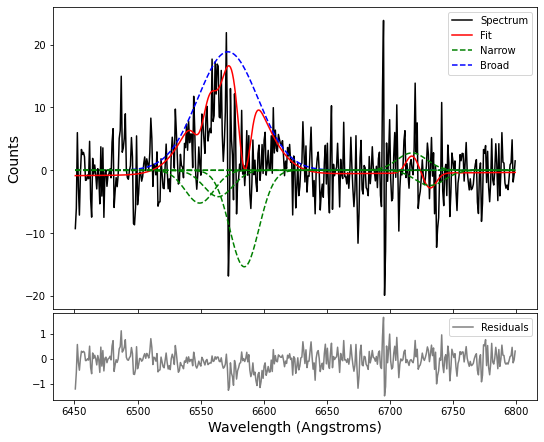

Spaxel= [ 31 , 35 ]
Fit= [ 16.75325672   2.44673933   4.70633323   1.79640047 -21.35237895
  89.78321842  11.66751384 -37.98079427 528.34309387  -1.75686254
  12.0849878 ] 
 MC error= [2.36742626e+12 6.24261738e+03 7.57001465e+05 1.16094091e+04
 4.67975082e+01 2.71715935e+01 1.60160824e+01 7.57101076e+02
 5.94884052e+02 6.49417851e+00 4.32420108e+01]


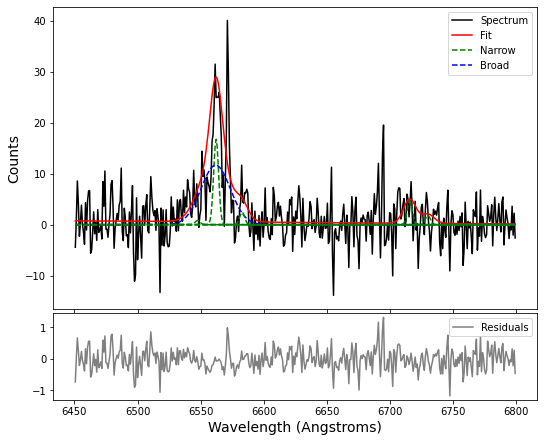

Spaxel= [ 32 , 35 ]
Fit= [ 25.97200469   1.17257418   3.62435349   6.70865965 -42.84728687
 122.40440566   8.6211914  -80.9671779  707.93448622  -3.21089471
  22.02695896] 
 MC error= [7.79274668e+12 3.34338484e+02 9.52526219e+05 4.53504763e+03
 4.97555415e+01 4.57978444e+01 5.08163518e+01 5.90586044e+03
 2.21837958e+03 5.55160781e+01 4.00256932e+02]


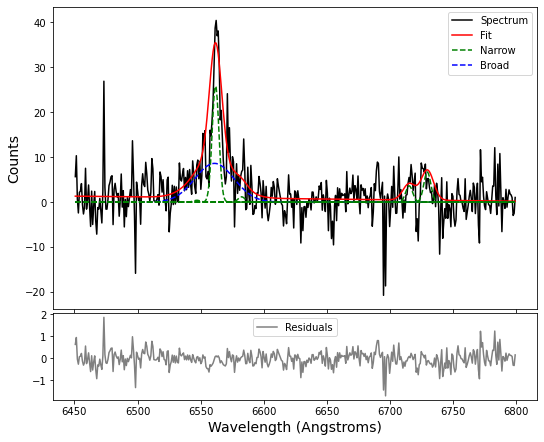

Spaxel= [ 33 , 35 ]
Fit= [  32.99532836    4.24069118    2.31718466    6.18125162   -8.52484259
  125.38633459    7.59506925 -315.16531541  872.81989167    1.70589038
  -10.50540853] 
 MC error= [1.60713151e+12 2.93254573e+02 8.35544172e+04 5.81553346e+05
 3.73268430e+01 4.81599539e+01 1.97641642e+01 5.48715100e+02
 5.03644262e+02 7.60467367e+00 5.10784129e+01]


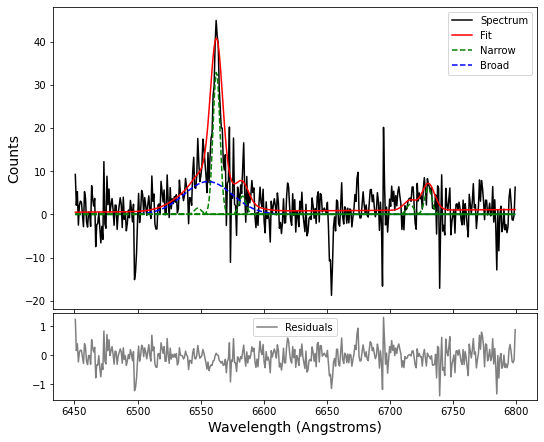

Spaxel= [ 34 , 35 ]
Fit= [ 2.39577366e+01  1.03139945e+01  1.39559009e+00  2.78262140e+00
  2.85304128e+01  1.59567421e+02  8.50048782e+00 -3.03156648e+02
  4.08136279e+02 -3.63550075e-01  3.54062811e+00] 
 MC error= [7.31443944e+12 4.19083246e+04 3.43654414e+05 7.86663974e+05
 3.72133843e+01 4.35676789e+01 2.93319183e+01 8.27061213e+02
 6.49981255e+02 5.61301710e+00 3.76415171e+01]


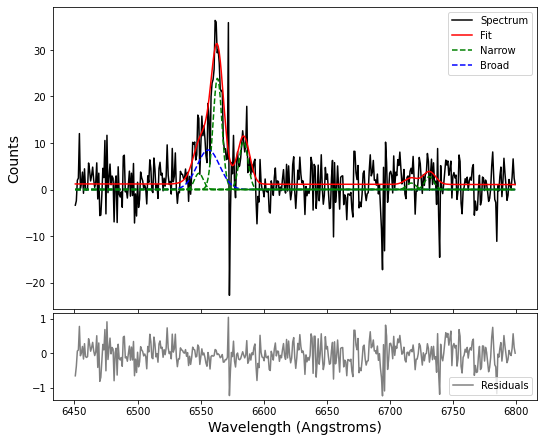

Spaxel= [ 35 , 35 ]
Fit= [ 2.11514563e+01  5.76376949e+00  3.07342649e+00  2.52407243e+00
 -4.17011051e+01  1.74772546e+02  2.58331902e+00 -9.00559082e+02
  3.82434880e+02  1.57966346e-01  2.09112981e-02] 
 MC error= [8.10286595e+10 4.13444797e+03 5.29997392e+05 2.03268255e+03
 5.59689502e+01 3.31640578e+01 4.20564119e+03 1.05523285e+04
 9.14725143e+03 8.49560299e+02 6.74595344e+03]


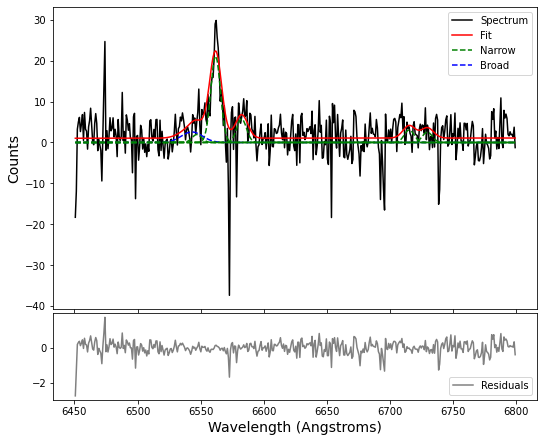

Spaxel= [ 36 , 35 ]
Fit= [ 3.85798782e+00 -3.28231020e+00  2.33378618e+00  2.99537704e+00
 -4.96237961e+02  4.51676952e+02  1.84429454e+02 -1.11240217e+04
  1.39580278e+04  3.23506733e+02 -2.25867726e+03] 
 MC error= [4.34863136e+11 1.32255419e+03 3.45628609e+05 8.74399028e+04
 4.06025432e+01 1.67064334e+01 1.79981770e+04 1.39147208e+04
 1.23271134e+04 2.29591720e+03 1.94837843e+04]


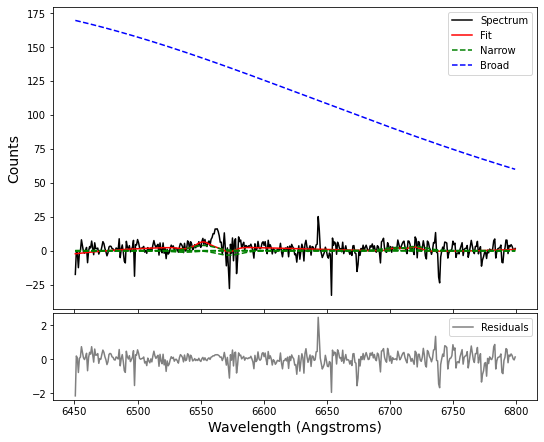

Spaxel= [ 30 , 36 ]
Fit= [ 4.29431831e+00 -3.84052695e+00 -1.83474793e+00 -1.25437891e+00
  9.36644119e+00 -3.61615697e-01  4.91941021e+00 -2.18132231e+02
  6.42690207e+02  3.27799302e+00 -2.14336855e+01] 
 MC error= [6.10240293e+09 1.37192727e+05 8.01723226e+04 4.37455845e+07
 3.78527582e+01 2.89560976e+01 2.34834276e+04 5.74617709e+03
 5.28988667e+03 5.80514507e+02 4.43730634e+03]


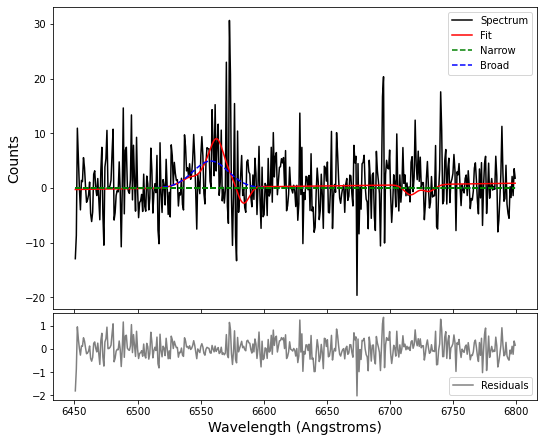

Spaxel= [ 31 , 36 ]
Fit= [    4.41406843 -1182.27241625   751.64044637   772.33686246
    12.16790753    -4.01610594     6.16689194  -106.42820751
   499.10927182     1.56489474   -10.05631304] 
 MC error= [1.53599764e+12 8.54133583e+02 6.94900578e+04 1.00906726e+03
 4.77786956e+01 3.82636218e+01 6.48383041e+01 2.19084788e+03
 2.15788210e+03 4.91129778e+01 3.39823668e+02]


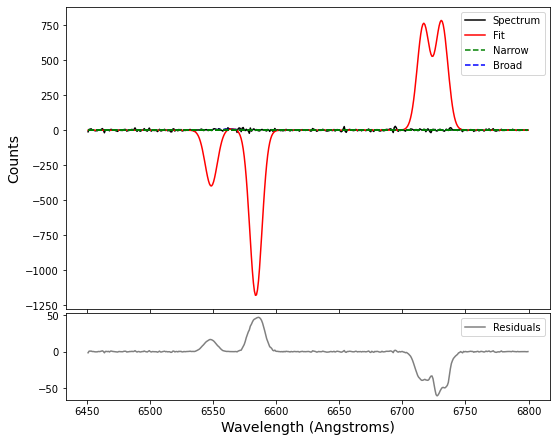

Spaxel= [ 32 , 36 ]
Fit= [-4.05996811e+00 -8.08843840e-03  7.01274706e-01  5.85612029e+00
 -1.63856275e+02  9.70915498e+01  5.77657727e+00 -5.21096643e+01
  6.87926443e+02  1.01922892e+00 -6.15383479e+00] 
 MC error= [4.27662352e+10 2.46252021e+04 2.01208315e+06 1.06304200e+05
 4.91280967e+01 3.81123662e+01 2.64109908e+04 6.79839092e+03
 9.05875035e+03 6.11243893e+02 4.96101709e+03]


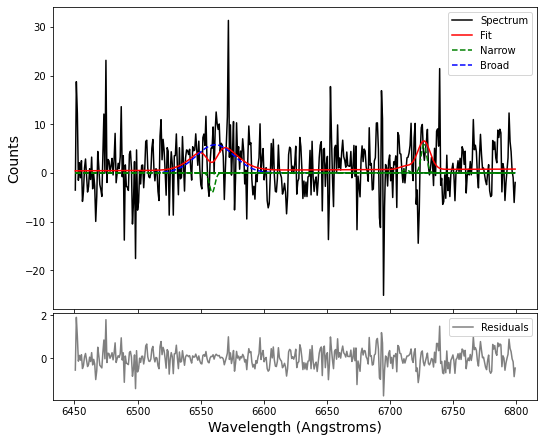

Spaxel= [ 33 , 36 ]
Fit= [ -2.49489497  10.74654359  -3.05688947  -1.51901338  -1.97179432
   1.20192231   8.00602901  38.41502595 370.31878507   2.3955103
 -14.9117981 ] 
 MC error= [6.35384201e+07 7.48619169e+03 5.89301005e+05 9.06578163e+07
 3.84489298e+01 3.00143433e+01 7.53895583e+03 2.04836756e+03
 1.54309104e+03 1.33841780e+01 9.19081779e+01]


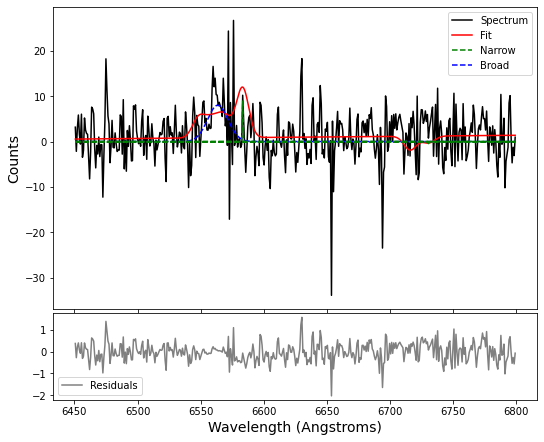

Spaxel= [ 34 , 36 ]
Fit= [ 12.42305499   6.17094976  -2.160252    10.72640181 -34.86896514
  24.03058984   6.22269898 251.08081311 489.8126153    1.12988504
  -6.7137687 ] 
 MC error= [2.81178321e+11 1.95150214e+04 3.22335510e+05 7.66528626e+06
 4.87000121e+01 3.06660621e+01 6.39577319e+03 9.71290441e+02
 7.16692211e+02 1.34089102e+01 9.04047300e+01]


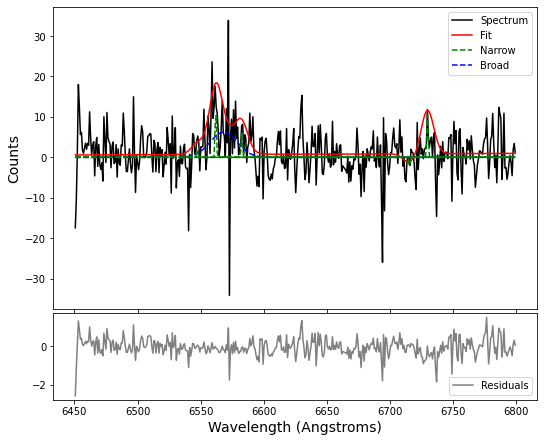

Spaxel= [ 35 , 36 ]
Fit= [  1.12644175   9.86646165   8.82145265  11.09439305 -27.61819691
  22.2393901   13.73967048 -74.03530035 106.35997477   3.09570988
 -20.04914911] 
 MC error= [1.23311720e+10 1.75026112e+04 1.21256678e+05 9.27068586e+06
 4.00862241e+01 4.00810320e+01 6.84213299e+03 1.09807598e+04
 8.78896919e+03 2.06854638e+03 1.62125006e+04]


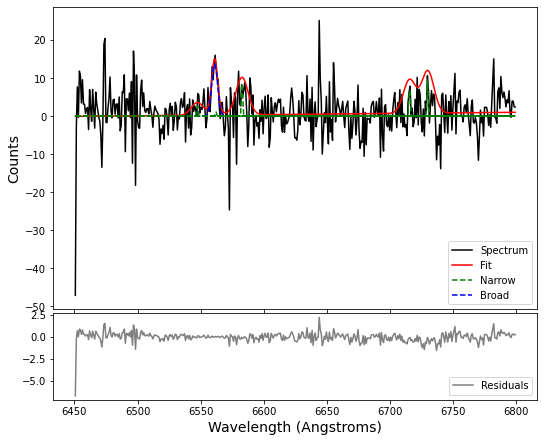

Spaxel= [ 36 , 36 ]
Fit= [-4.17492281e+00 -1.72466322e+00  4.51057423e+00  7.47293800e+00
  1.99449807e+02  6.58293740e+01  1.98281879e+01 -3.78228431e+03
  1.11245510e+04  3.59970653e+01 -2.53815517e+02] 
 MC error= [1.36982073e+11 2.02878855e+03 3.40631381e+05 3.92479684e+04
 4.25651824e+01 3.42333999e+01 1.32603479e+04 3.03664676e+03
 2.32597895e+03 8.45540144e+01 5.95419325e+02]


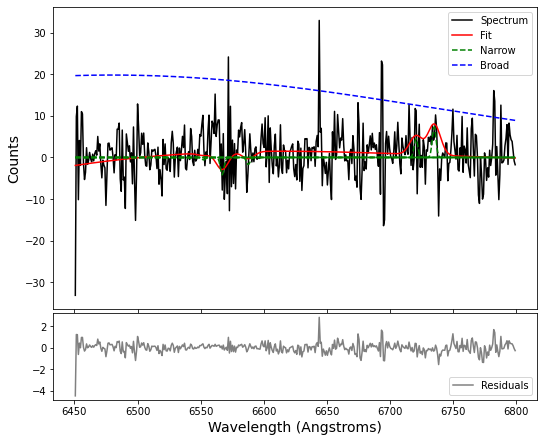

In [6]:
redshift = 1.40915     #spectroscopic redshift for nuclear region

cube, spec, waverange = input_cube()
error = error_cube(redshift, waverange, spec)
fitting_central7x7(redshift, waverange, cube, error)


In [ ]:
 # northern arc region

In [ ]:
def input_cubeNA():
    
    fits_filename = ('/Users/orion/phd_research/3C297/finalcube_3C297_mediansubtracted.fits')     
    hdul = fits.open(fits_filename)
    data_cube = hdul[0].data
    cube_header = hdul[0].header 

    cw = cube_header['CRVAL3']         
    mp = cube_header['CDELT3']       

    y = data_cube[:,45,45]
    x = np.arange(len(y))
    start_w = cw - cube_header['CRPIX3']*mp 
    x = start_w + x*mp
    
    return data_cube, y, x


def error_cubeNA(z, x, y):

    error_cube = ('/Users/orion/phd_research/3C297/line_fitting/error_cubes/northernarc_error_cube.fits')  
    hdul2 = fits.open(error_cube)
    d_error = hdul2[0].data
    stderror = d_error[:,45,45]
    
    k = 1+z
    wave = (x/k)*10000
    select = (wave>6450) & (wave<6800)
    error_spec = stderror[select]
    small_wave1 = wave[select]
    data_spec1 = y[select]
    #getting rid of nans by smoothing 
    gauss = Gaussian1DKernel(stddev=3)   
    #needed to increase kernel size becoz of post-convolution NaNs warning
    err_spec_temp1 = convolve(error_spec, gauss)

    select_cont = (small_wave1>6650) & (small_wave1<6680)
    flux_cont = np.std(data_spec1[select_cont])
    flux_err = np.mean(err_spec_temp1[select_cont])
    b = flux_cont/flux_err
    err_spec = b*err_spec_temp1

return err_spec

In [ ]:
def fitting1_NorthernArc(z,x,data_cube,err_spec,i,j):

    # includes Ha_broad 
    
    initial_guess = [20, 5, 5, 5, 0, 50, 0, 10]   
    # amp_Ha,amp_NII6585,amp_SII6716,amp_SII6730,vel,vel_sigma,amp_HaB,vel_HaB,vel_sigma_HaB, m, c
    
    print ('Spaxel= [',i,',',j,']')
    y = data_cube[:,i,j]
    y[np.isnan(y)] = 1e-15
    small_wave, small_spec = data_init(z,x,y)
    fit_params, err_params = ltsq_mc_fitting_Narc(i0,small_wave,small_spec,err_spec)
    print (fit_params,'\n', err_params)
    plot_Narc(small_wave,small_spec,err_spec,fit_params)

    return fit_params, err_params

In [ ]:
def fitting2_NorthernArc(z,x,data_cube,err_spec,range1,range2):
    
    # northern arc  region:  39 spaxels

    # No Halpha broad
    i0 = [40, 10, 5, 5, 0, 100, 0, 10]
    # amp_Ha,amp_NII6585,amp_SII6716,amp_SII6730,vel,vel_sigma,m,c

    for i in range(range1,range2):
        print ('Spaxel= [',i,',',range2,']')
        y = data_cube[:,range2,i]
        y[np.isnan(y)] = 1e-15
        small_wave, small_spec = data_init(z,x,y)
        fit_params, err_params = ltsq_mc_fitting_Narc(i0,small_wave,small_spec,err_spec)
        print (fit_params,'\n', err_params)
        plot_Narc(small_wave,small_spec,err_spec,fit_params)
        
    return fit_params, err_params
 

In [ ]:
redshift = 1.40691     #spectroscopic redshift for NORTHERN ARC 

cube, spec, waverange = input_cubeNA()
error = error_cubeNA(redshift, waverange, spec)

Spaxel= [ 45 , 45 ]
[ 25.31018316   3.75086131   4.12610508   1.33125995 -41.94817483
 120.46247419  -4.14267563  27.62168875] 
 [ 1.12440746  3.2247723   2.06154881  2.03816035  8.68026632  7.83970404
  2.05145985 13.56263371]


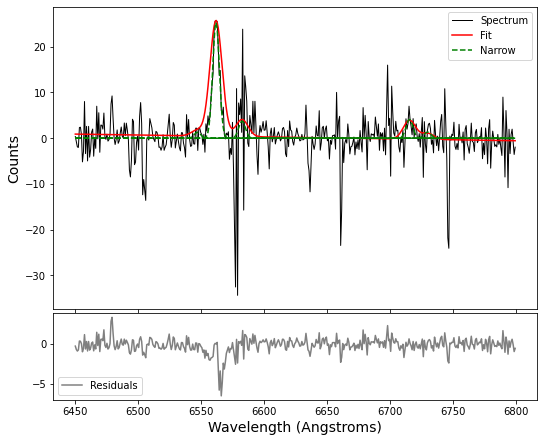

In [8]:
full_fit = np.zeros(len(i0))    
full_err = np.zeros(len(i0))

# spaxel [45,45] 
fit45, err45 = fitting1_NorthernArc(redshift, waverange, cube, error, 45, 45)

full_fit = np.vstack([full_fit, fit45])
full_err = np.vstack([full_err, err45]) 

Spaxel= [ 41 , 47 ]
[ 14.24575197   2.91324419   0.44637071  -3.03503196   5.19291836
 127.44690491   0.94218215  -7.02469734] 
 [ 0.92345374  3.27451066  1.80603674  1.95032605 18.69188646 15.17891917
  1.97868409 13.0838809 ]


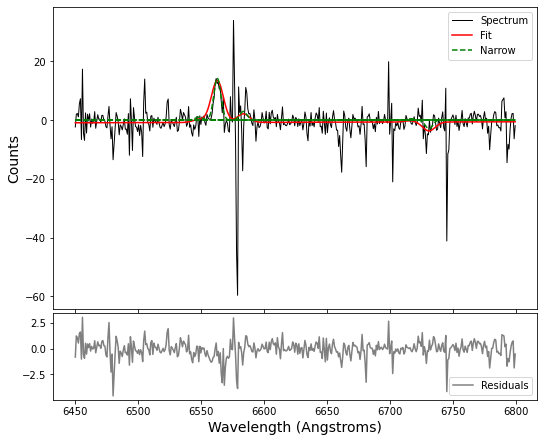

Spaxel= [ 42 , 47 ]
[ 14.89303708   4.84088212  -0.75425057   1.81574459  -0.45428074
 145.1376343    0.32163892  -2.55678797] 
 [ 0.82078415  2.93567689  1.52659107  1.78026143 18.67815186 17.45855983
  2.01821506 13.34911127]


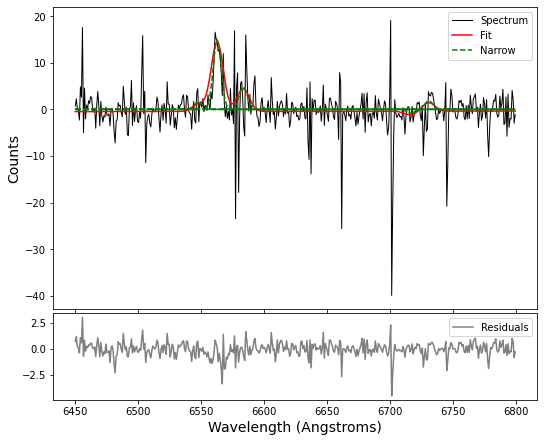

Spaxel= [ 43 , 47 ]
[ 15.12246834  -1.90433116  -0.21137508   3.30269297 -26.86749284
 126.40173489  -0.37032576   1.81464858] 
 [ 1.04057302  3.96011867  1.80142828  1.79280125 15.48235973 14.19777338
  2.07470708 13.69969721]


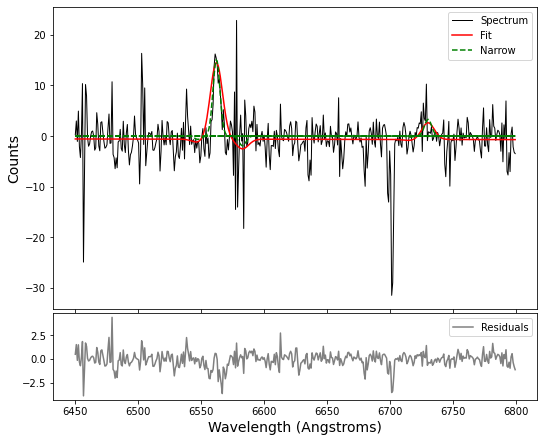

Spaxel= [ 44 , 47 ]
[ 13.54666772  -2.93935665   1.86082384   1.3086549  -26.89835227
 119.59159188  -6.39190405  42.03147544] 
 [ 1.22238411  3.71518445  2.02443705  2.0897218  18.50754374 20.58562062
  1.90020413 12.56396558]


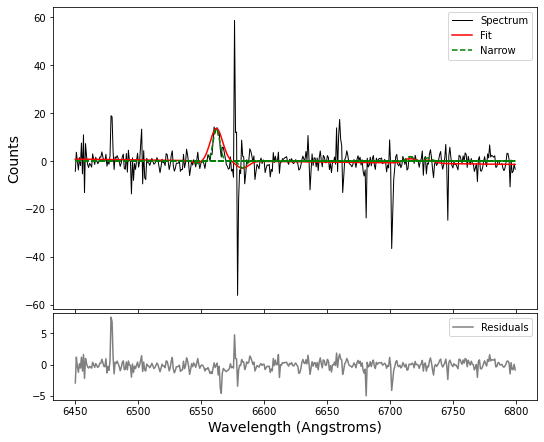

Spaxel= [ 45 , 47 ]
[ 1.11390235e+01 -3.98737266e+00  2.67965886e+00  1.85488460e-02
  2.39422057e+00  1.61798189e+02 -1.60792292e+00  1.01477823e+01] 
 [ 0.83282421  3.22404945  1.78265557  1.85517986 28.31021123 26.05136065
  1.69186209 11.14824081]


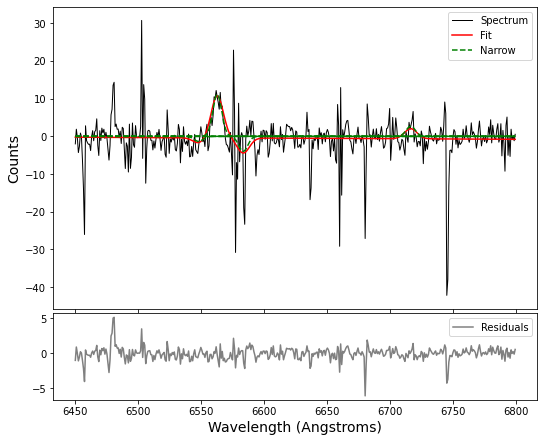

Spaxel= [ 46 , 47 ]
[ 6.99362805e+00 -2.10016121e+00  2.64892257e+00  2.18731342e-02
  5.78354930e+01  1.17071413e+02 -4.75243728e+00  3.12701264e+01] 
 [ 0.9708035   3.46652179  1.84851908  2.09106623 35.47541875 30.28614428
  2.0230485  13.3936758 ]


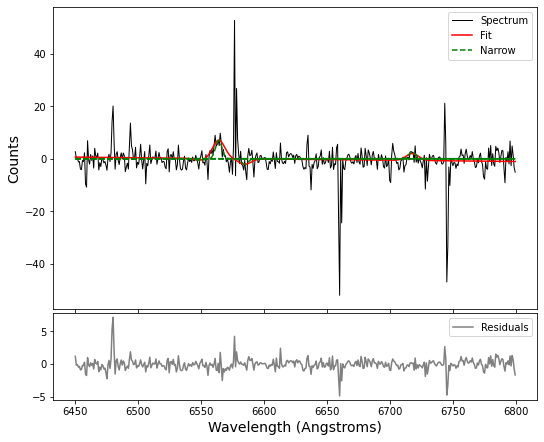

Spaxel= [ 41 , 49 ]
[ 21.00120609   3.82578527   0.88673993  -3.6905694  -13.62200837
 117.65559297  -2.7831211   18.62644339] 
 [ 1.04615252  3.61905343  1.97488191  1.95592198  9.12216584  9.62773341
  2.14964532 14.18757738]


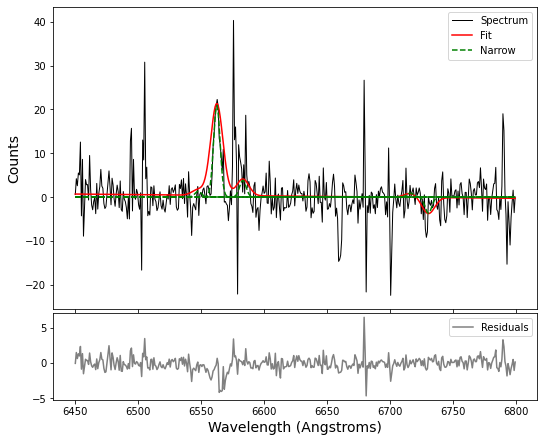

Spaxel= [ 42 , 49 ]
[ 2.15024729e+01  4.96648017e+00  1.26029723e-01  1.03154692e+00
 -1.38633680e+01  1.39825460e+02  4.94288338e-01 -2.95833646e+00] 
 [ 0.85736323  3.53503698  1.66486783  1.81933224 10.80964441  9.6531602
  2.21536908 14.62632524]


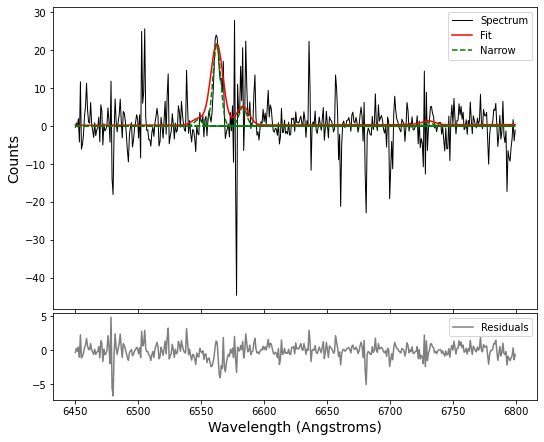

Spaxel= [ 43 , 49 ]
[ 23.54955163   3.37034266   0.68640453   0.99552616 -30.89457955
 114.02022845  -2.21373492  14.67076702] 
 [ 1.11377967  3.37359902  2.01637363  2.17546118  8.26675682  7.89267932
  2.10391561 13.8812009 ]


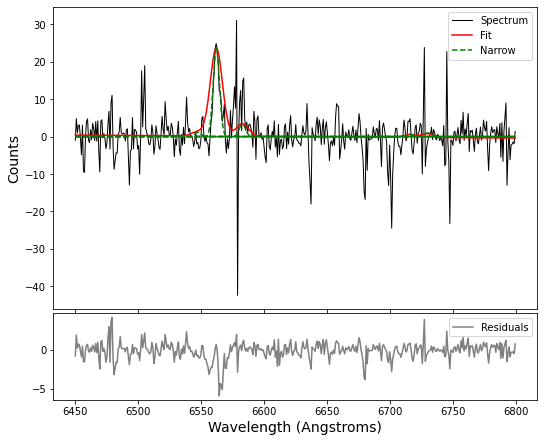

Spaxel= [ 44 , 49 ]
[ 20.44346528   1.50956584   1.87097716   1.82461919 -12.11256583
 116.74787275  -5.27167479  35.48187055] 
 [ 0.88648263  3.21070398  1.91548861  1.84991013 10.45755442 11.11861039
  2.01834494 13.3444676 ]


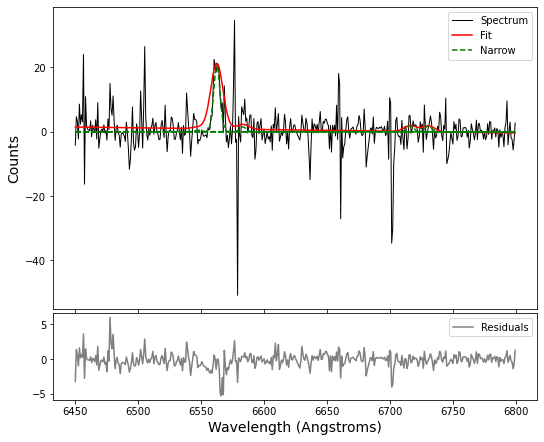

Spaxel= [ 45 , 49 ]
[ 17.83135317   4.72898962   2.90083426   1.7436142  -17.50772329
 132.37827665  -2.1259301   13.83287045] 
 [ 1.00253264  3.1858378   1.88001728  1.90565256 12.54110974 12.5264551
  2.06862718 13.63896615]


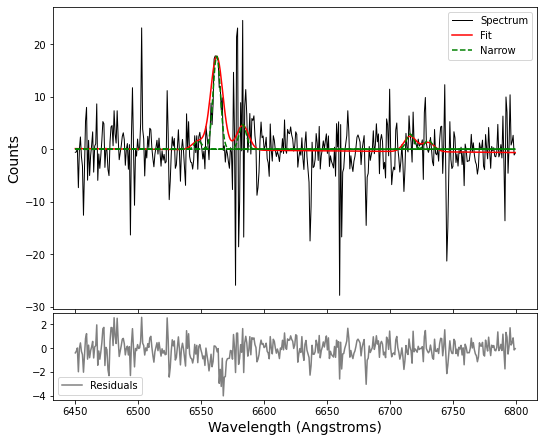

Spaxel= [ 46 , 49 ]
[ 12.32914774   0.26521815   2.66252294  -3.54988482   4.50378756
 127.85921841  -3.46005113  23.00994168] 
 [ 0.81695278  3.53819247  1.69711732  1.95139183 18.05656653 19.10761664
  2.06187426 13.61814465]


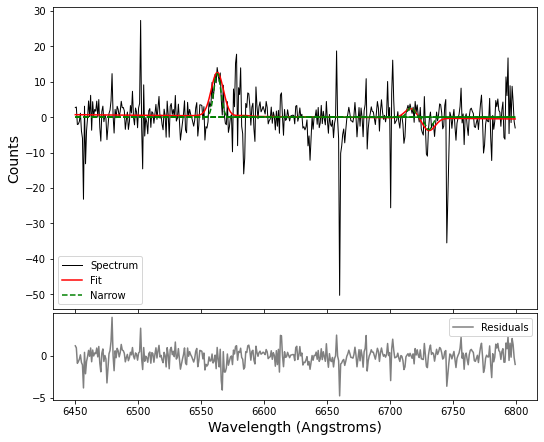

Spaxel= [ 47 , 49 ]
[ 11.53467632   1.01051268   1.41904387   1.76577907  55.09517675
 123.10730385   0.20414858  -1.48607967] 
 [ 0.88786519  2.69078057  1.70477539  2.05484352 15.2773788  16.71675158
  2.2762359  15.05536094]


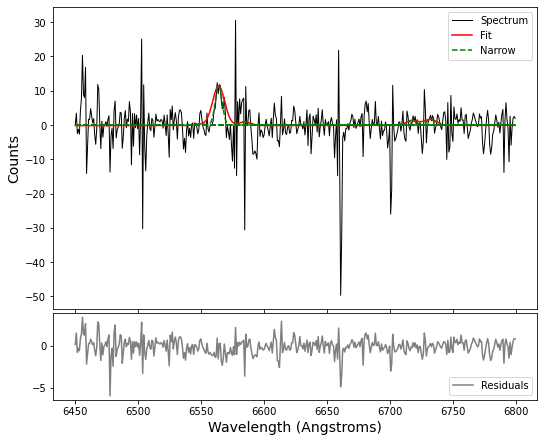

Spaxel= [ 48 , 49 ]
[ 10.18786547  -0.52748497   2.37948289   5.22982162  92.22645386
 110.91013742  -3.66477802  24.10354199] 
 [ 0.83130671  2.7177054   1.61838093  1.95048693 13.69134057 11.28338069
  2.06973132 13.67783004]


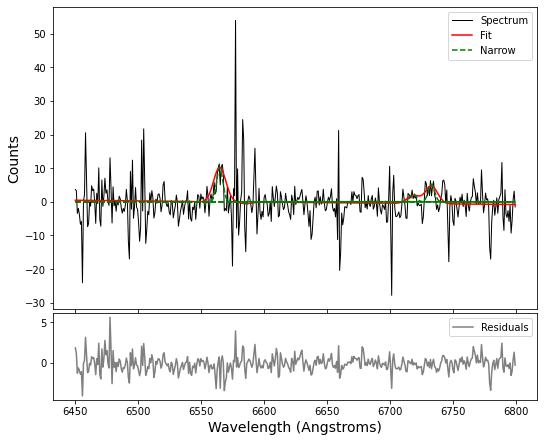

Spaxel= [ 43 , 45 ]
[ 2.52781553e+01  7.81006306e+00  2.08147422e+00  7.82556113e-01
 -3.65054326e+01  1.28220334e+02 -1.25779196e-01  8.64870289e-01] 
 [ 1.1420295   3.92358279  1.71479042  2.07097547  9.35744492  8.64132454
  1.82251277 12.03139749]


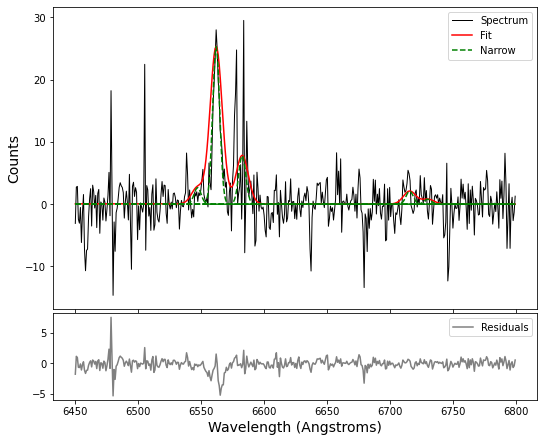

Spaxel= [ 44 , 45 ]
[ 26.63662192   5.84477791   2.59236576   0.42649075 -36.54196194
 119.71166734  -0.87768114   5.97824636] 
 [ 1.07691627  4.56940066  1.94587535  2.02760721  8.16860083  7.45423598
  2.10969887 13.95837103]


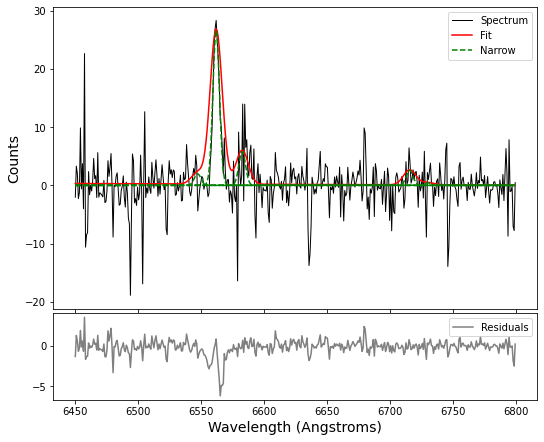

Spaxel= [ 45 , 45 ]
[ 25.296498     4.70423109   4.00963837   1.21384029 -42.41591709
 120.77449528  -3.80090267  25.39981099] 
 [ 1.18906352  3.56011936  1.73963312  1.89519844  8.79037801  8.79208133
  1.86050926 12.28074618]


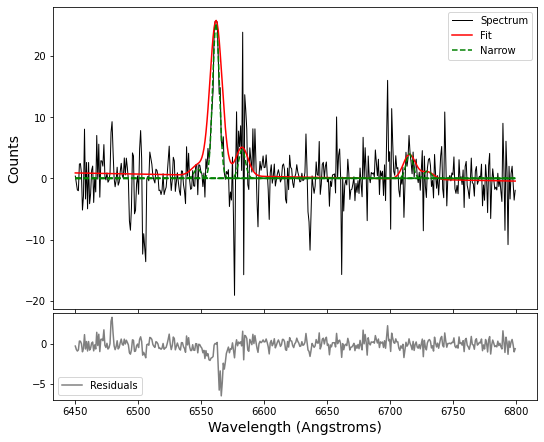

Spaxel= [ 46 , 45 ]
[ 21.05113468  -2.87935957   2.42412397  -2.17166196 -29.87416602
 118.06451049  -1.71489815  11.48508261] 
 [ 1.06485024  3.5423885   1.8188615   2.1146034  12.59035995 10.72218789
  1.80576632 11.95440737]


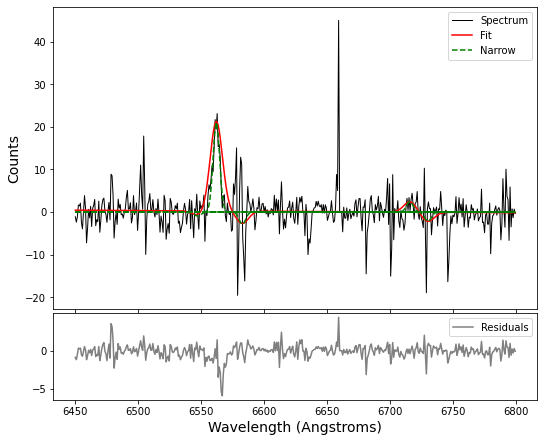

Spaxel= [ 47 , 45 ]
[ 1.78691327e+01  2.68160591e+00  9.94768446e-01  5.38736541e-02
  2.07467013e+01  1.16077558e+02  4.08525951e-02 -2.16597732e-01] 
 [ 0.84645446  2.79698726  1.79836438  1.66100226 11.74298803 15.35437808
  2.01911532 13.34502709]


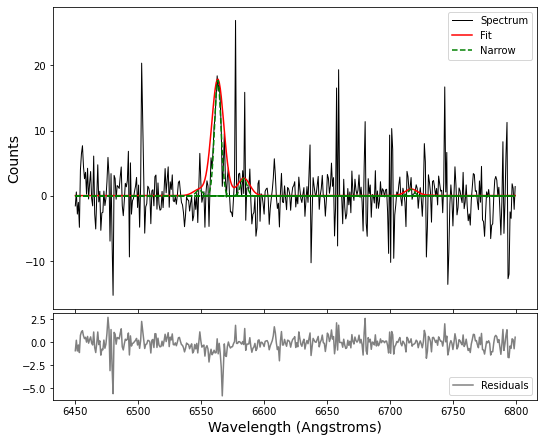

Spaxel= [ 48 , 45 ]
[ 11.88776866  -2.09127163   1.70544408   3.79767621  27.5067438
 151.84526352  -1.68124227  10.87222257] 
 [ 0.85535948  2.6323704   1.45277913  1.81280098 24.50547854 31.38152194
  2.44276367 16.11208088]


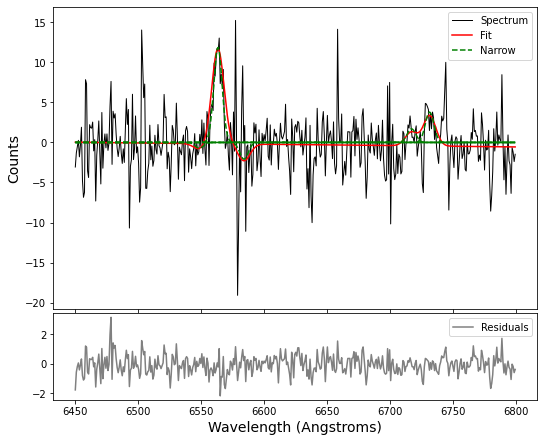

Spaxel= [ 49 , 45 ]
[  9.27554433  -0.91064318   0.48969446   1.7543668   28.12275328
 167.57473546   0.32583965  -2.32716107] 
 [ 0.81535045  2.51790283  1.52923231  1.62962433 28.1053873  43.16793747
  2.00994607 13.29921325]


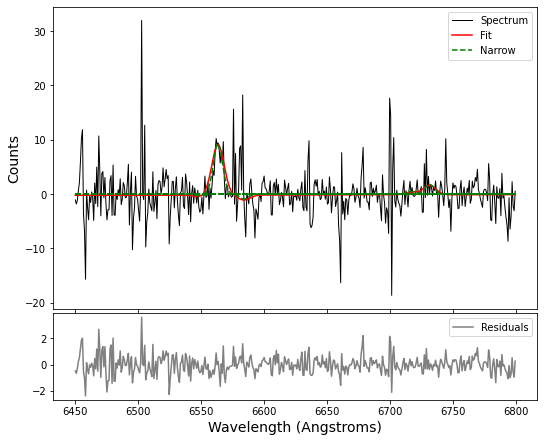

Spaxel= [ 50 , 45 ]
[  6.18334201   2.42872801   0.45968055   0.85288165  48.36257297
 124.98154967   1.82456271 -12.51688447] 
 [ 0.98863486  2.99368821  1.85570478  2.26655387 56.31194403 97.3005229
  2.34144319 15.49992318]


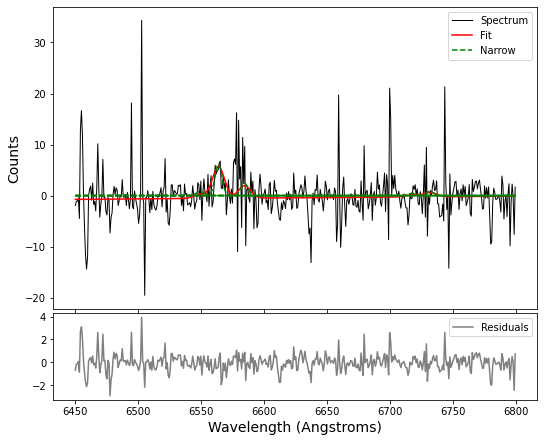

Spaxel= [ 43 , 44 ]
[ 26.18683903   3.96851807   2.63305468   1.73128299 -53.91714935
 121.50479709   0.98846495  -6.25904377] 
 [ 1.27623099  3.60485991  2.23169881  2.17128043  9.51027901 10.09979559
  2.12674541 14.03951738]


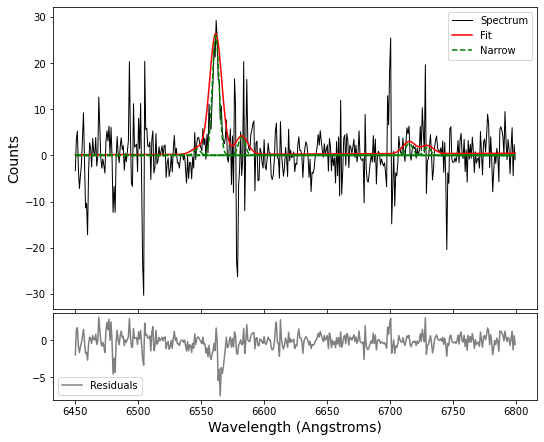

Spaxel= [ 44 , 44 ]
[ 34.08495505   8.30451779   3.82021327  -0.45649758 -60.75349222
 118.61766413   3.20050985 -21.37695146] 
 [ 1.30716223  3.75104725  1.80429662  2.08892568  7.3487271   7.57261136
  1.94552386 12.88276477]


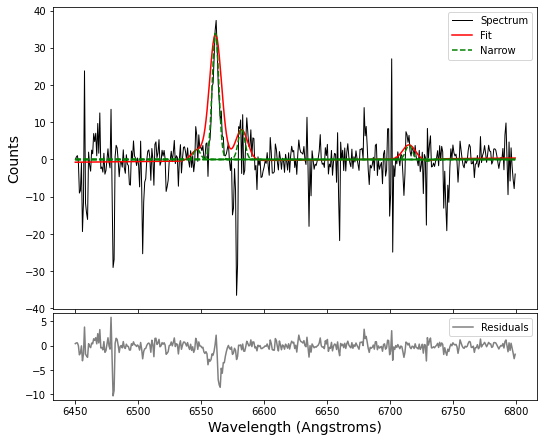

Spaxel= [ 45 , 44 ]
[ 33.81708688   4.07664508   4.46966926  -2.67711044 -62.28331277
 114.28294673  -1.02869877   7.45804316] 
 [ 1.70398379  4.15144312  1.97156048  2.20084498  6.29943979  7.7390203
  2.23244511 14.7881408 ]


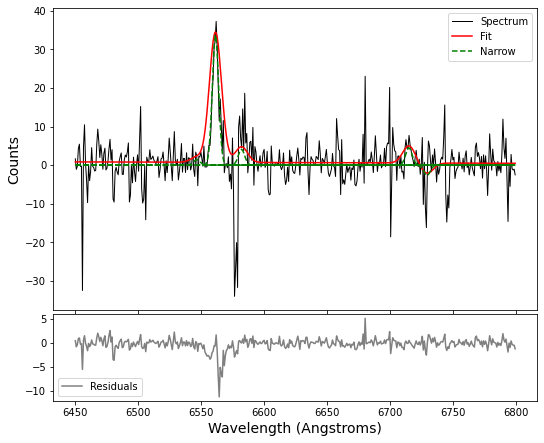

Spaxel= [ 46 , 44 ]
[ 28.12744146  -7.73433356   2.67313006  -0.52192195 -51.36358774
 108.65489166  -3.23546015  22.02805964] 
 [ 1.04151786  3.73460082  2.60678667  2.65266213  7.81572421  7.0110099
  1.92233472 12.6755366 ]


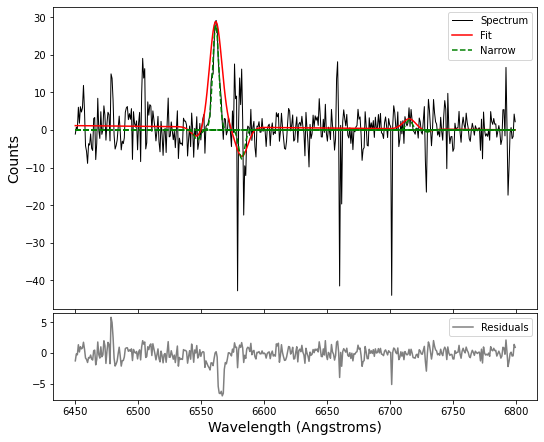

Spaxel= [ 47 , 44 ]
[ 24.83646859   3.87323508   1.35211687   1.71899709  -4.57367541
 103.98055385   2.53511455 -16.56359318] 
 [ 1.06773974  3.7293116   1.69506253  2.35103101 11.34991007 11.24995196
  1.70036429 11.22992122]


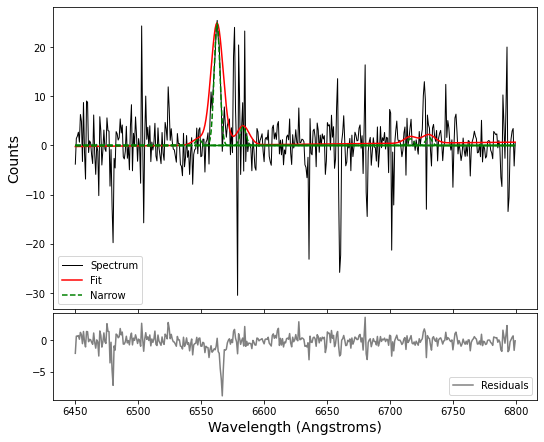

Spaxel= [ 48 , 44 ]
[ 15.31750478  -2.3504654    0.59850923   2.02165114 -23.85550647
 166.64050874   0.69645314  -4.67439402] 
 [ 1.04661243  3.09386039  1.73616007  1.74530309 19.98757778 20.64985286
  1.95455972 12.91961439]


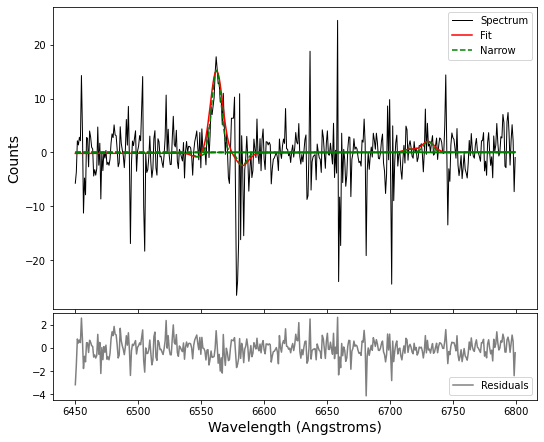

Spaxel= [ 49 , 44 ]
[ 11.94783997   3.94125294   0.58590446   3.03568345  10.31354369
 144.04345336  -3.20814896  21.43699741] 
 [ 0.85688394  3.00158523  1.77208365  1.78158681 17.87359773 18.9770921
  2.22931976 14.70728574]


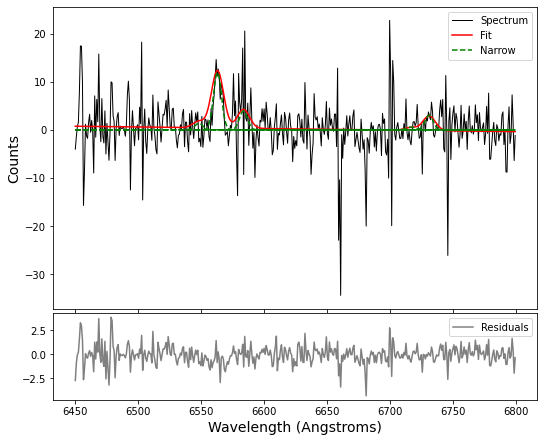

Spaxel= [ 50 , 44 ]
[  7.2111195    0.82660538   1.45162606   2.94087125  66.34183949
 101.41593761   4.29396962 -29.04930825] 
 [ 1.10899136  4.34760366  2.17283757  2.08847999 59.75795652 66.46738739
  2.31927373 15.33044373]


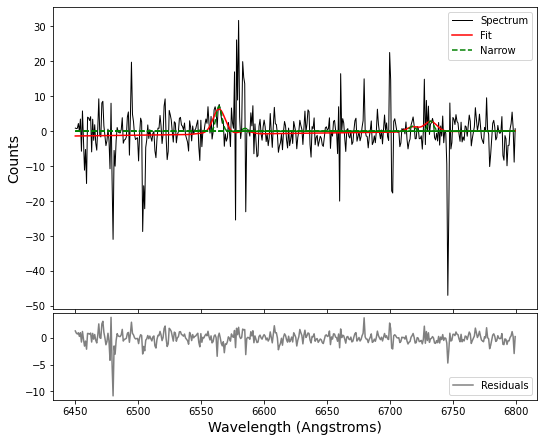

Spaxel= [ 47 , 42 ]
[ 15.86725293   4.95136345   2.15956701   2.5887491  -74.35386882
 179.77116678   1.15490824  -8.4109022 ] 
 [ 1.22882598  2.91687602  1.53661585  1.91290651 17.58386547 17.79132778
  2.29507212 15.18324944]


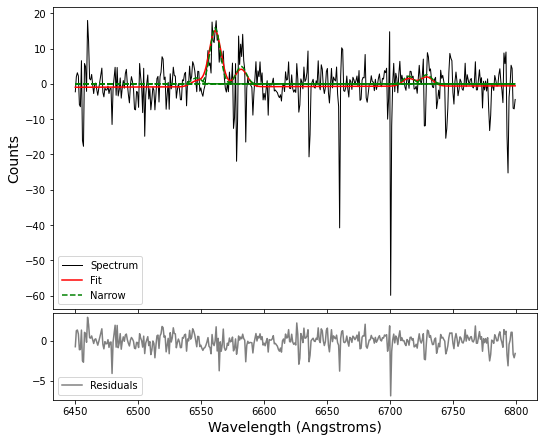

Spaxel= [ 48 , 42 ]
[ 14.66241082   4.62917373   1.77927785   4.356185   -34.2227278
 150.87755943   1.47935527  -9.92986624] 
 [ 0.85364295  2.96817215  1.77910677  2.06375631 22.21498346 20.94156953
  2.2672442  14.96918239]


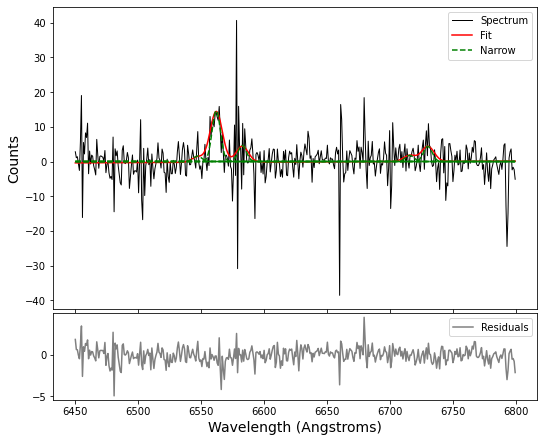

Spaxel= [ 49 , 42 ]
[ 10.55930588   2.04662936  -0.690909     2.57146887   1.50231799
 169.45752133  -2.30103138  15.57616728] 
 [ 0.79221201  3.54184515  1.5128312   1.75978406 37.36964353 54.25007202
  2.10639046 13.87908928]


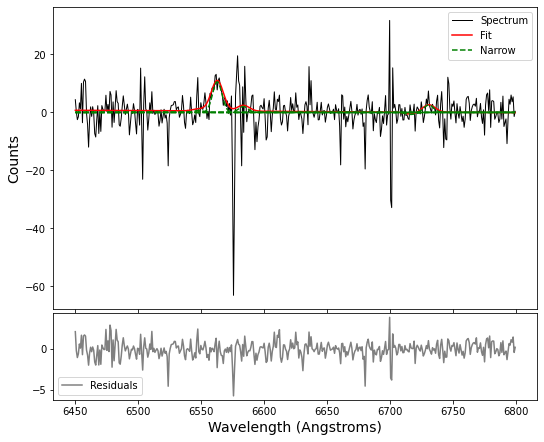

Spaxel= [ 48 , 41 ]
[  19.36395523    0.30333554    1.64779403    3.13076169 -102.79733251
  136.79153156    1.92988066  -13.08959573] 
 [ 1.48235833  3.79382211  1.79622562  2.01636316 19.73944245 13.17393412
  2.0012009  13.20894254]


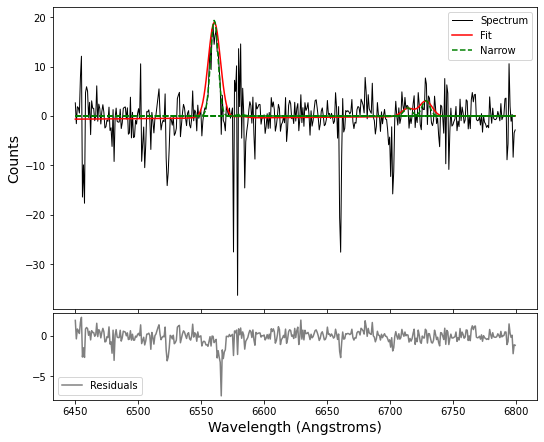

Spaxel= [ 49 , 41 ]
[ 11.93606521   1.50705316  -0.39180849   0.86023529 -83.19794571
 188.81622889   1.44950509  -9.40992964] 
 [ 1.1604348   3.48544545  1.86759375  1.88287096 36.35592982 33.36124671
  2.35177409 15.52872665]


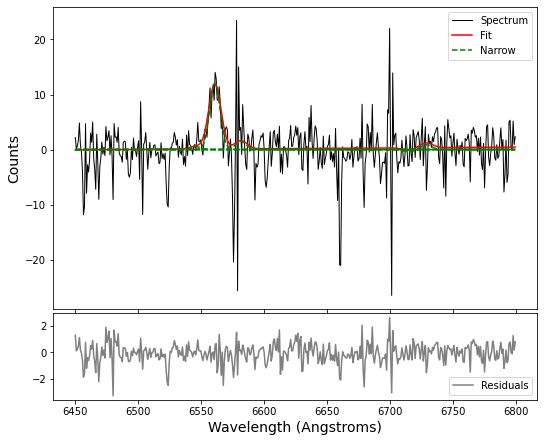

Spaxel= [ 50 , 41 ]
[  7.76851365   2.55865151   0.35153352   0.48351352 -83.72695033
 272.64427584   1.99470495 -13.45004995] 
 [ 1.15717025  3.05491866  1.42735838  1.52936092 81.36734614 80.93903279
  2.18827509 14.50478969]


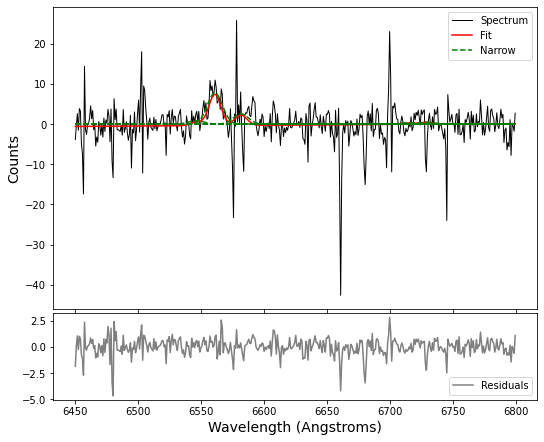

Spaxel= [ 49 , 40 ]
[  15.25534101    2.89641636   -1.3477134     1.29047415 -153.98513747
  159.47962995    3.89107363  -25.3423773 ] 
 [ 1.67239179  3.64109959  1.83635484  2.49099151 23.4372569  15.34927462
  1.94981031 12.85910539]


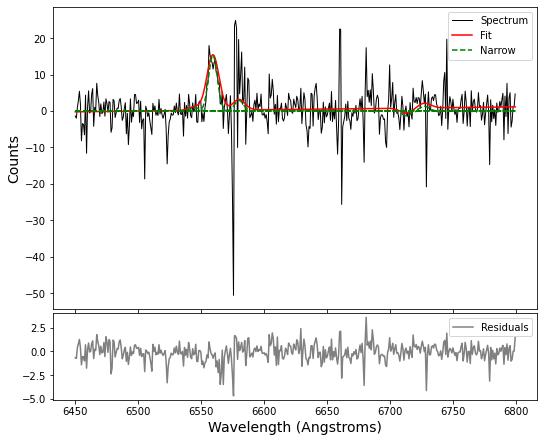

Spaxel= [ 50 , 39 ]
[ 1.20227992e+01  9.94610679e-01  1.17303564e+00  3.12936226e+00
 -1.48962937e+02  2.08510920e+02 -1.98980161e-01  1.08972045e+00] 
 [ 1.65427268  2.90584632  1.42977248  1.95846161 25.58087277 21.97671218
  2.1354006  14.1152023 ]


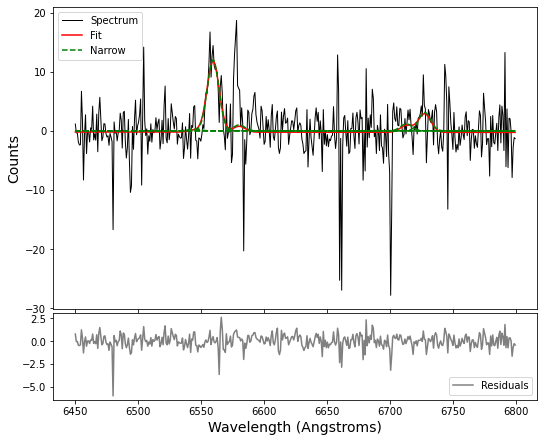

In [9]:
fit, err = fitting2_NorthernArc(redshift,waverange,cube,error,41,47)
full_fit = np.vstack([full_fit, fit])
full_err = np.vstack([full_err, err])
fit, err = fitting2_NorthernArc(redshift,waverange,cube,error,41,49)
full_fit = np.vstack([full_fit, fit])
full_err = np.vstack([full_err, err])
fit, err = fitting2_NorthernArc(redshift,waverange,cube,error,43,51)
full_fit = np.vstack([full_fit, fit])
full_err = np.vstack([full_err, err])
fit, err = fitting2_NorthernArc(redshift,waverange,cube,error,47,50)
full_fit = np.vstack([full_fit, fit])
full_err = np.vstack([full_err, err])
fit, err = fitting2_NorthernArc(redshift,waverange,cube,error,48,51)
full_fit = np.vstack([full_fit, fit])
full_err = np.vstack([full_err, err])
fit, err = fitting2_NorthernArc(redshift,waverange,cube,error,49,50)
full_fit = np.vstack([full_fit, fit])
full_err = np.vstack([full_err, err])


In [ ]:
# save arrays to table
np.savetxt('NA_final-vstack_fit_params.txt', full_fit, fmt='%4.2f', delimiter='\t')
np.savetxt('NA_final-vstack_params_err.txt', full_err, fmt='%4.2f', delimiter='\t')